In [1]:
import datetime
import numpy as np
import pandas as pd
import random
import re 
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import wordnet
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import random
import re 
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
talk_df = pd.read_csv('Data/has_transcript.csv', index_col = 0)

# Replace -- with np.nan, convert columns to appropriate types

In [4]:
talk_df.views = talk_df.views.replace('--', np.nan)
talk_df.views = talk_df.views.astype(float)

talk_df.comments = talk_df.comments.replace('--', np.nan)
talk_df.comments = talk_df.comments.astype(float)

talk_df.date_recorded = talk_df.date_recorded.replace('--', np.nan)
talk_df.date_recorded = pd.to_datetime(talk_df.date_recorded, format = '%Y-%m-%d')

talk_df.upload_date = talk_df.upload_date.replace('--', np.nan)
talk_df.upload_date = pd.to_datetime(talk_df.upload_date, format = '%Y-%m-%d')

In [5]:
def process_tags(tags):
    return tags.strip('[').strip(']').strip('\'').split('\', \'')

In [6]:
talk_df['tags'] = talk_df['tags'].apply(process_tags)

In [7]:
talk_df['tag_len'] = talk_df['tags'].apply(len)
talk_df['transcript_cc'] = talk_df['transcript'].apply(len)
talk_df['transcript_wc'] = talk_df['transcript'].apply(lambda transcript: len(str(transcript).split()))

In [320]:
talk_df.head()

,date,speaker,title,url,length,summ,tags,views,transcript,date_recorded,upload_date,occupation,bio,comments,duration,tag_len,transcript_cc,transcript_wc,lemmas,lemma_len
0,Jan 2020,Ipsita Dasgupta,"To challenge the status quo, find a ""co-conspi...",/talks/ipsita_dasgupta_to_challenge_the_status...,11:03,"In a complex and changing world, how can we ma...","[innovation, collaboration, society, social ch...",599446.0,So I've been thinking about how to explain thi...,2019-09-24,2020-01-02,"Business executive, ""co-conspirator""",Ipsita Dasgupta drives the consumption of ente...,7.0,663,10,10379,1874,"[think, explain, concept, decide, start, under...",347
1,Jan 2020,Rod Phillips,A brief history of alcohol,/talks/rod_phillips_a_brief_history_of_alcohol,4:56,Nobody knows exactly when humans began to crea...,"[TED-Ed, education, animation, history, cultur...",501290.0,This chimpanzee stumbles across a windfall of ...,2020-01-02,2020-01-02,NaN,NaN,NaN,296,7,4107,649,"[chimpanzee, stumble, windfall, overripe, plum...",216
2,Jan 2020,Pat Mitchell,Dangerous times call for dangerous women,/talks/pat_mitchell_dangerous_times_call_for_d...,17:14,Pat Mitchell has nothing left to prove and muc...,"[women, women in business, community, activism...",461705.0,"Recently, I've been declaring to anyone who wo...",2019-12-04,2020-01-02,Dangerous woman,Pat Mitchell is a lifelong advocate for women ...,14.0,1034,12,10691,1884,"[recently, declare, listen, dangerous, woman, ...",437
3,Dec 2019,Cara E. Yar Khan,The beautiful balance between courage and fear,/talks/cara_e_yar_khan_the_beautiful_balance_b...,9:55,After being diagnosed with a rare genetic cond...,"[fear, personal growth, health, life, humanity...",880662.0,"When we're young, we're innocently brave, and ...",2019-12-04,2019-12-23,Human rights and disability activist,Cara E. Yar Khan is an international human rig...,17.0,595,7,7658,1373,"[young, innocently, brave, fearlessly, dream, ...",337
4,Dec 2019,Valorie Kondos Field,Why winning doesn't always equal success,/talks/valorie_kondos_field_why_winning_doesn_...,15:49,Valorie Kondos Field knows a lot about winning...,"[success, sports, leadership, empathy, compass...",956498.0,"OK, I have a question for all of us. You ready...",2019-12-04,2019-12-20,Gymnastics coach,Valorie Kondos Field is the retired head coach...,18.0,949,11,10161,1793,"[question, ready, win, success, recently, reti...",360


In [321]:
talk_df.reset_index(drop = True, inplace = True)

In [322]:
talk_df.to_csv('has_transcript_clean.csv')

# Histograms of Numerical Data

In [77]:
talk_df.date_recorded.min()

Timestamp('1984-02-02 00:00:00')

In [78]:
talk_df.date_recorded.max()

Timestamp('2020-01-02 00:00:00')

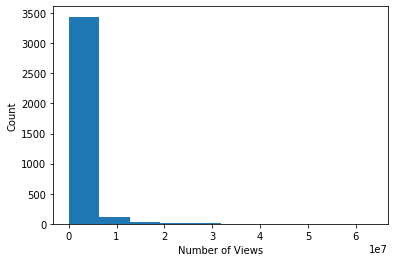

In [72]:
plt.hist(x = talk_df.views);
plt.xlabel('Number of Views');
plt.ylabel('Count');

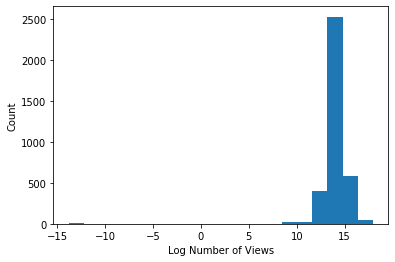

In [73]:
views_log = [x + 0.000001 if x == 0 else x for x in talk_df.views]

plt.hist(x = np.log(views_log), bins = 20);
plt.xlabel('Log Number of Views');
plt.ylabel('Count');

Text(0, 0.5, 'Count')

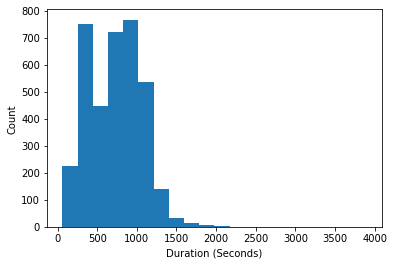

In [74]:
plt.hist(x = talk_df.duration, bins = 20);
plt.xlabel('Duration (Seconds)');
plt.ylabel('Count')

Text(0, 0.5, 'Count')

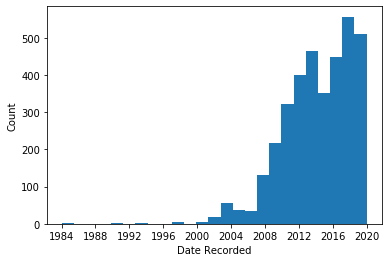

In [98]:
plt.hist(talk_df[talk_df.date_recorded.notnull()].date_recorded, bins = 25);
plt.xlabel('Date Recorded')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

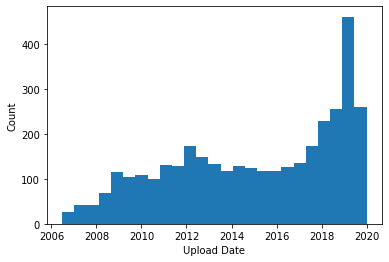

In [100]:
plt.hist(talk_df[talk_df.upload_date.notnull()].upload_date, bins = 25);
plt.xlabel('Upload Date')
plt.ylabel('Count')

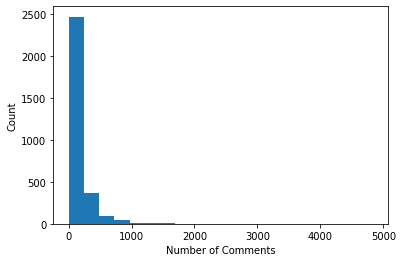

In [102]:
plt.hist(talk_df.comments, bins = 20);
plt.xlabel('Number of Comments');
plt.ylabel('Count');

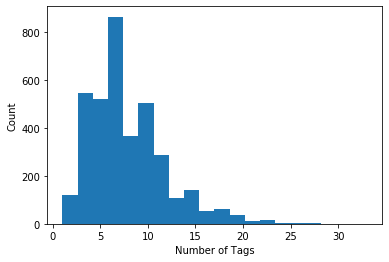

In [29]:
plt.hist(talk_df.tag_len, bins = 20);
plt.xlabel('Number of Tags');
plt.ylabel('Count');

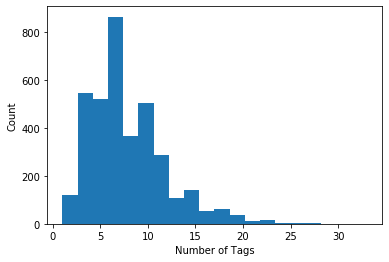

In [39]:
plt.hist(talk_df.tag_len, bins = 20);
plt.xlabel('Number of Tags');
plt.ylabel('Count');

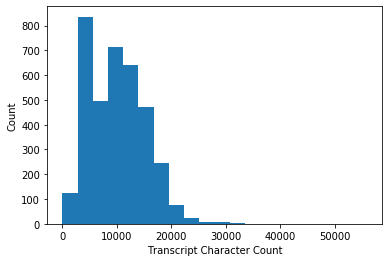

In [40]:
plt.hist(talk_df.transcript_cc, bins = 20);
plt.xlabel('Transcript Character Count');
plt.ylabel('Count');

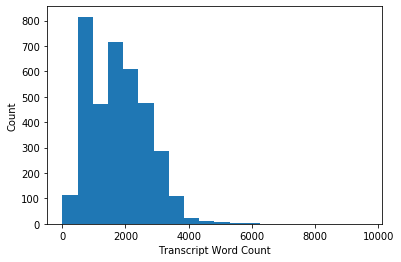

In [41]:
plt.hist(talk_df.transcript_wc, bins = 20);
plt.xlabel('Transcript Word Count');
plt.ylabel('Count');

# 

# Tokenization Helper Functions

In [11]:
# Adds in space between punctuation and words

def add_spaces(text):
    
    # Find instances of punctuation followed by two letters
    cleanr = re.compile('[.!?,;][A-Za-z][A-Za-z]')
    no_spaces = re.findall(cleanr, text)

    if len(no_spaces) > 0:
        for match in no_spaces:
            punc = match[0] # get the punctuation mark
            word = match[1:] # get the start of the word
            
            if punc != '?':
                text = re.sub(f"{match}", f"{punc} {word}", text)
            
            # Special case of ?, cannot be escaped
            else:
                text = re.sub(f"[?]{word}", f"? {word}", text)
    
    return text

In [12]:
sentence = 'What do I do?There are missing spaces.Did the function work?'
add_spaces(sentence)

'What do I do? There are missing spaces. Did the function work?'

In [13]:
# Handles numbers with 1) commas, 2) before hyphens, 3) in places (1st, 2nd, 3rd, etc.)

def handle_numbers(text):
    
    # Handle numbers with commas
    clean_commas = re.compile('[0-9]+,[0-9][0-9][0-9]')
    num_commas = re.findall(clean_commas, text)

    if len(num_commas) > 0:
        for match in num_commas:
            replace_str = match.replace(',', '')
            text = re.sub(f"{match}", f"{replace_str}", text)
    
    # Handle numbers with hyphens
    clean_numbers = re.compile('[0-9]+-')
    numbers = re.findall(clean_numbers, text)

    if len(numbers) > 0:
        for match in numbers:
            text = re.sub(f"{match}", "# ", text)
    
    # Handle 1st, 2nd, 3rd with hyphens
    text = text.replace('1st-', '1st ').replace('2nd-', '2nd ').replace('3rd-', '3rd ')
    
    # Handle -th with hyphens
    clean_places = re.compile('[0-9]th-')
    places_hyphen = re.findall(clean_places, text)

    if len(places_hyphen) > 0:
        for match in places_hyphen:
            text = re.sub(f"{match}", f"{match[:-1]} ", text)
    
    return text

In [14]:
test_numbers = 'A 5-year-old boy ate a 3,000-year-old Twinkie. He won 1st-place at the 3rd-annual bakesale. He was the 5th-person.'
handle_numbers(test_numbers)

'A # year-old boy ate a # year-old Twinkie. He won 1st place at the 3rd annual bakesale. He was the 5th person.'

In [215]:
def handle_parentheses(text):
    
    # Add spaces before and after parentheses
    text = text.replace(')', ')\n').replace('(', ' (')
    
    # Find all parenthetical phrases
    clean_parentheses = re.compile('\(.*\)')
    parentheses = re.findall(clean_parentheses, text)
    
    if len(parentheses) > 0:
        for match in parentheses:
            try:
                text = re.sub(f'{match}', ' ', text)
            except:
                text = re.sub('(Applause.)', '. ', text)
                text = re.sub('(Laughter.)', '. ', text)
                text = re.sub('(Music.)', '. ', text)
                text = text.replace('(Applause.', '. ')
                text = text.replace('(Laughter.', '. ')
                text = text.replace('(Music.', '. ')
                text = re.sub('\(|\)', '. ', text)
    
    text = text.replace('( )', '')
    
    return ' '.join(text.split())

In [212]:
set(spacy_tokenizer(talk_df.transcript[2]))

{'21st',
 '70',
 'able',
 'accomplish',
 'acknowledge',
 'action',
 'activism',
 'activist',
 'advise',
 'advocate',
 'aerobically',
 'affirmative',
 'african',
 'age',
 'agitate',
 'ago',
 'agreement',
 'alliance',
 'allocate',
 'ally',
 'anchor',
 'angry',
 'announce',
 'appearance',
 'applaud',
 'aside',
 'ask',
 'assault',
 'aware',
 'bad',
 'balance',
 'barrier',
 'bear',
 'begin',
 'believe',
 'belong',
 'best',
 'big',
 'bit',
 'blonde',
 'board',
 'body',
 'boldly',
 'bos',
 'brave',
 'break',
 'breakthrough',
 'brief',
 'brilliant',
 'brilliantly',
 'bring',
 'build',
 'burn',
 'campaign',
 'candidate',
 'candle',
 'card',
 'care',
 'career',
 'caregiving',
 'center',
 'century',
 'certain',
 'chair',
 'challenge',
 'champion',
 'change',
 'charge',
 'child',
 'city',
 'civil',
 'civility',
 'claim',
 'classroom',
 'clear',
 'clearly',
 'click',
 'climate',
 'close',
 'coalition',
 'colleague',
 'collective',
 'college',
 'color',
 'colorfully',
 'come',
 'community',
 'compar

# Stopwords and Punctuation

In [189]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [191]:
stop_words = list(stop_words)
stop_words.extend(['yeah', 'ya', 'ah', 'um', 'oh', 'actually', 'literally', 'like', 's', 'applause'])

# Initialize Lemmatizer

In [192]:
lemmatizer = WordNetLemmatizer()

# Tokenization Function

In [216]:
def spacy_tokenizer(text):
    
    # Remove .., ..., ....
    no_ellipses = text.replace('....', '').replace('...', '').replace('..','').replace('…', '')
    
    # Remove parenthetical phrases
    no_parentheses = handle_parentheses(no_ellipses)
    
    # Add missing spaces after punctuation
    with_spaces = add_spaces(no_parentheses)
    
    # Handle numbers with commas
    clean_numbers = handle_numbers(with_spaces)
    
    # Remove quotation marks
    no_quotes = clean_numbers.replace('\"', ' ').replace('”', ' ').replace('’', '')
    
    # Address hyphenation issue -- need to revisit
    no_ism = no_quotes.replace('-ism', 'ism')
    no_dash = no_ism.replace('–', ' ').replace('—', ' ').replace('-', '')
    
    # Remove parentheses
#     no_parentheses = no_dash.replace('(', ' ').replace(')', ' ')
    
    # Remove music notes
    no_notes = no_dash.replace('♪', '').replace('♫', '')
    
    # SPECIFIC RULE
    no_spec = no_notes.replace('R and D', 'research and development').replace('R & D', 'research and development')
    
    # Replace all whitespace with one space
    cleantext = ' '.join(no_spec.split())
    cleantext = cleantext.strip()
    
    # Lemmatize here
    # Creating our token object, which is used to create documents with linguistic annotations.
    # we disabled the parser and ner parts of the pipeline in order to speed up parsing
    mytokens = nlp(cleantext.lower(), disable=['parser', 'ner'])

    # Lemmatizing each token and converting each token into lowercase
    lemmas = []
    for word in mytokens:
        if word.pos_ == 'NOUN':
            lemmas.append(lemmatizer.lemmatize(word.text.lower().strip(), wordnet.NOUN))
        elif word.pos_ == 'VERB':
            lemmas.append(lemmatizer.lemmatize(word.text.lower().strip(), wordnet.VERB))
        elif word.pos_ == 'ADV':
            lemmas.append(lemmatizer.lemmatize(word.text.lower().strip(), wordnet.ADV))
        elif word.pos_ == 'ADJ':
            lemmas.append(lemmatizer.lemmatize(word.text.lower().strip(), wordnet.ADJ))

    lemmas = [word for word in lemmas if word not in stop_words and word not in punctuations]
    
    # return preprocessed list of tokens
    return lemmas

In [21]:
sentence = 'This is a complex sentence, (applause) which will test the lemmatizer to see whether it will return all the words.'
spacy_tokenizer(sentence)

['complex', 'sentence', 'test', 'lemmatizer', 'return', 'word']

In [22]:
sentence_2 = 'This chimpanzee stumbles across a windfall of overripe plums. Many of them have split open, drawing him to their intoxicating fruity odor.'
spacy_tokenizer(sentence_2)

['chimpanzee',
 'stumble',
 'windfall',
 'overripe',
 'plum',
 'split',
 'open',
 'draw',
 'intoxicate',
 'fruity',
 'odor']

In [27]:
spacy_tokenizer(talk_df.transcript[3633])

['year',
 'person',
 'think',
 'ted',
 'regime',
 'talk',
 'medium',
 'lab',
 'today',
 'people',
 'read',
 'press',
 'week',
 'quit',
 'medium',
 'lab',
 'quit',
 'medium',
 'lab',
 'step',
 'chairman',
 'kind',
 'ridiculous',
 'title',
 'thing',
 'professor',
 'stay',
 'professor',
 'rest',
 'life',
 'laptop',
 'child',
 'sort',
 'year',
 'half',
 'tell',
 'use',
 'minute',
 'tell',
 'point',
 'pass',
 'laptop',
 'ask',
 'talk',
 'big',
 'issue',
 'figure',
 'start',
 'drive',
 'pretty',
 'obvious',
 'amazing',
 'meet',
 'head',
 'state',
 'precious',
 'natural',
 'resource',
 'child',
 'child',
 'pretty',
 'quickly',
 'agree',
 'hard',
 'agree',
 'solution',
 'big',
 'problem',
 'include',
 'education',
 'education',
 'element',
 'education',
 'certainly',
 'little',
 'bit',
 'obvious',
 'room',
 'learn',
 'walk',
 'talk',
 'teach',
 'talk',
 'teach',
 'walk',
 'interact',
 'world',
 'certain',
 'result',
 'consequence',
 'able',
 'ask',
 'able',
 'stand',
 'reach',
 'age',
 'tell',

In [449]:
talk_df.transcript[1]

'This chimpanzee stumbles across a windfall of overripe plums. Many of them have split open, drawing him to their intoxicating fruity odor. He gorges himself and begins to experience some… strange effects. This unwitting ape has stumbled on a process that humans will eventually harness to create beer, wine, and other alcoholic drinks.The sugars in overripe fruit attract microscopic organisms known as yeasts. As the yeasts feed on the fruit sugars they produce a compound called ethanol— the type of alcohol in alcoholic beverages. This process is called fermentation. Nobody knows exactly when humans began to create fermented beverages. The earliest known evidence comes from 7,000 BCE in China, where residue in clay pots has revealed that people were making an alcoholic beverage from fermented rice, millet, grapes, and honey.Within a few thousand years, cultures all over the world were fermenting their own drinks. Ancient Mesopotamians and Egyptians made beer throughout the year from stor

# Handle open parentheses

In [178]:
talk_df.transcript[2604]

'Tonight, I want to have a conversation about this incredible global issue that\'s at the intersection of land use, food and environment, something we can all relate to, and what I\'ve been calling the other inconvenient truth.But first, I want to take you on a little journey. Let\'s first visit our planet, but at night, and from space. This is what our planet looks like from outer space at nighttime, if you were to take a satellite and travel around the planet. And the thing you would notice first, of course, is how dominant the human presence on our planet is. We see cities, we see oil fields, you can even make out fishing fleets in the sea, that we are dominating much of our planet, and mostly through the use of energy that we see here at night. But let\'s go back and drop it a little deeper and look during the daytime. What we see during the day is our landscapes.This is part of the Amazon Basin, a place called Rondônia in the south-center part of the Brazilian Amazon. If you look 

In [186]:
def handle_parentheses_(text):
    
    # Add spaces before and after parentheses
    text = text.replace(')', ')\n').replace('(', ' (')
    
    # Find all parenthetical phrases
    clean_parentheses = re.compile('\(.*\)')
    parentheses = re.findall(clean_parentheses, text)
    
    # return(parentheses)
    
    if len(parentheses) > 0:
        for match in parentheses:
            # print(match)
            try:
                text = re.sub(f'{match}', '', text)
            except:
                text = re.sub('\(|\)', ' ', text)
    
    text = text.replace('()', '')
    
    return ' '.join(text.split())

handle_parentheses_(talk_df.transcript[2604])

'Tonight, I want to have a conversation about this incredible global issue that\'s at the intersection of land use, food and environment, something we can all relate to, and what I\'ve been calling the other inconvenient truth.But first, I want to take you on a little journey. Let\'s first visit our planet, but at night, and from space. This is what our planet looks like from outer space at nighttime, if you were to take a satellite and travel around the planet. And the thing you would notice first, of course, is how dominant the human presence on our planet is. We see cities, we see oil fields, you can even make out fishing fleets in the sea, that we are dominating much of our planet, and mostly through the use of energy that we see here at night. But let\'s go back and drop it a little deeper and look during the daytime. What we see during the day is our landscapes.This is part of the Amazon Basin, a place called Rondônia in the south-center part of the Brazilian Amazon. If you look 

In [187]:
handle_parentheses_(talk_df.transcript[3554])

'There\'s a lot of exciting things happening in the design world and at IDEO this past year, and I\'m pleased to get a chance to share some of those with you.I didn\'t attend the first TED back in 1984 but I\'ve been to a lot of them since that time. I thought it [would] kind of be interesting to think back to that time when Richard got the whole thing started. Thank you very much, Richard; it\'s been a big, enjoyable part of my life, coming here.And so thinking back, I was thinking those of us in Silicon Valley were really focused on products or objects — certainly technological objects. And so it was great fun in those days, and some of those of you who are in the audience were my clients. We\'d come in with some prototype underneath a black cloth and we\'d put it on the conference table, and we\'d pull off the black cloth and everybody would "ooh" and "ah." That was a really good time.And so we\'ll continue to focus on products, as we always have. And if you were here last year, I p

# Check transcripts where 0 lemmas

In [217]:
all_lemmas = talk_df.transcript.apply(spacy_tokenizer)

In [230]:
lemma_len = [len(set(lemmas)) for lemmas in all_lemmas]

In [232]:
talk_df['lemmas'] = all_lemmas
talk_df['lemma_len'] = lemma_len

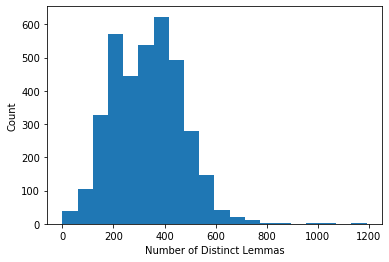

In [233]:
plt.hist(talk_df.lemma_len, bins = 20);
plt.xlabel('Number of Distinct Lemmas');
plt.ylabel('Count');

In [219]:
min(lemma_len)

0

In [220]:
max(lemma_len)

4865

In [221]:
index = []
for i in range(0, len(lemma_len)):
    if lemma_len[i] == 0:
        index.append(i)

In [222]:
index

[1583, 1678, 1825, 2345, 2844]

In [97]:
talk_df.transcript[1583]

'(Guitar music starts)(Music ends)(Applause)(Distorted guitar music starts)(Music ends)(Applause)(Ambient/guitar music starts)(Music ends)(Applause)'

In [96]:
talk_df.transcript[1678]

'(Music)(Music) (Applause)(Applause)'

In [95]:
talk_df.transcript[1825]

'(Music)(Applause)'

In [223]:
talk_df.transcript[2345]

'(Mechanical noises)(Music) (Applause)'

In [224]:
talk_df.transcript[2844]

'(Music)(Applause)(Music)(Applause)'

In [225]:
all_lemmas

0       [think, explain, concept, decide, start, under...
1       [chimpanzee, stumble, windfall, overripe, plum...
2       [recently, declare, listen, dangerous, woman, ...
3       [young, innocently, brave, fearlessly, dream, ...
4       [question, ready, win, success, recently, reti...
5       [want, psychologist, teenager, spend, year, pu...
6       [4th, century, banker, son, throw, city, scand...
7       [crazy, idea, think, couple, decade, ago, case...
8       [volunteer, group, local, food, pantry, south,...
9       [follow, tweet, twitter, break, news, explosio...
10      [mother, son, endless, desert, wear, special, ...
11      [atomically, connect, fundamentally, universal...
12      [reluctantly, seat, eastern, corner, mahjong, ...
13      [know, easy, think, microbe, bad, especially, ...
14      [good, day, shinnecock, nation, cahuilla, peop...
15      [idea, activist, mean, fight, idea, believe, p...
16      [lose, faith, humanity, serve, british, destro...
17      [fanta

# Word Counts of Whole Corpus

In [235]:
all_lemmas_corpus = []
for doc in all_lemmas:
    all_lemmas_corpus.extend(doc)

In [236]:
len(all_lemmas_corpus)

2327990

In [239]:
from collections import Counter
word_bank = dict(Counter(all_lemmas_corpus))

In [257]:
len(word_bank.keys())

52037

In [297]:
words_less_than_1 = {key: value for key, value in word_bank.items() if value < 2}
words_more = {key: value for key, value in word_bank.items() if value > 1}

In [298]:
for word in sorted(words_less_than_1, key=words_less_than_1.get, reverse=True):
    print(word, words_less_than_1[word])

mothersinlaw 1
mentees 1
frontseat 1
unconventionality 1
street.i 1
uppermiddleclass 1
overripe 1
temperance 1
grandmothering 1
stillsegregated 1
colorfully 1
aerobically 1
proved 1
dismount 1
eggsized 1
amazonian 1
horsebackriding 1
winatallcost 1
effusively 1
hyperfocused 1
unsympathetic 1
bullish 1
unempathetic 1
lifealtering.i 1
studentathletes 1
dictating 1
ohashis 1
selfexamining 1
destress 1
secondguessing 1
nonwork 1
selfsufficiently 1
kyôn 1
charitably 1
unprincipled 1
selfpromoting 1
lucians 1
revaluation 1
semianarchic 1
uninvent 1
fecund 1
massedproduced 1
mosquitosized 1
ultracentrifuge 1
incentivizes 1
assured 1
bioresearch 1
sociopathic 1
macrogovernance 1
microgovernance 1
snapples 1
refried 1
nowwasted 1
hartsfieldjackson 1
tastetestings 1
antifoodwaste 1
wefood 1
paywhatyoucan 1
hungerfighting 1
largestever 1
falsenews 1
spreader 1
informationtheoretic 1
botdetection 1
doctored 1
punchy 1
hissing 1
sandworm 1
superpowered 1
spiceassisted 1
gesserit 1
fremen 1
inuniver

conjoined 1
britishcontrolled 1
colonized 1
crosscontinental 1
midnights 1
folktale 1
nowsix 1
hundredmillionplus 1
firebreathing 1
bcell 1
crashdefense 1
hivaids 1
lymphocytic 1
leukemiafree 1
coapproved 1
rate.a 1
refractory 1
noncurative 1
antechamber 1
unclip 1
godson 1
officerrelated 1
reformminded 1
criminallegal 1
holstered 1
doorframe 1
protoplanetary 1
waals 1
repels 1
uncountably 1
relieving 1
belowtwodegree 1
suitwearing 1
content]i'm 1
gloom.i 1
nationallevel 1
safeguarding 1
lowt 1
muslimsounding 1
semitic 1
higharousal 1
engrossing 1
prescriptive 1
contrarianism 1
pearlclutching 1
virtuesignaling 1
slides.]moderator 1
language.i 1
ripened 1
tactilely 1
hooting 1
schoolattending 1
weakminded 1
perpetration 1
ninesession 1
scholls 1
graffitied 1
czechoslovakian 1
nils 1
hotspur 1
hundredish 1
bailiff 1
daughterinlaw 1
beanie 1
puhuu 1
sanomat 1
noncycled 1
hydrodynamic 1
analyzes 1
biogeochemists 1
fossilfuelderived 1
ultraluxurious 1
toprated 1
alalalala 1
twoparter 1
vitf

bookmaker 1
tuba 1
decretals 1
lawbreaker 1
chronica 1
unruffled 1
silents 1
everybodygetsaribbon 1
redblooded 1
pretenure 1
look.i 1
harebrained 1
taysachs 1
nicked 1
gs 1
diseaseassociated 1
rapidaging 1
survivalofthefittest 1
strandnicking 1
thalassemia 1
phenylketonuria 1
laboratoryevolved 1
sciencefictionlike 1
smokingban 1
fiveletter 1
waterfowl 1
povich 1
reclassification 1
comaintaining 1
cohitting 1
epcs 1
deforms 1
sixandahalfbillion 1
solarmass 1
spaghettification 1
supereasy 1
interestbased 1
selffueling 1
flushness 1
retweak 1
harristype 1
alternatives 1
twittanic 1
steelworks 1
roadimprovement 1
labour 1
lie,[immigration 1
invasion]because 1
undertow 1
farage 1
exemployee 1
handmaiden 1
kaist 1
dielectric 1
prestretched 1
selfsense 1
hydraulically 1
photoshopping 1
skinbleaching 1
lightening 1
lightskinned 1
scandinavia 1
antirich 1
wellnourished 1
nofgm 1
momposhi 1
flowy 1
weathered 1
cashonly 1
jampack 1
broadshouldered 1
shotokan 1
carnivory 1
fleshmunching 1
bog 1
su

mercifully 1
agediverse 1
ctoc 1
htoh 1
riffing 1
organizationally 1
moldinfested 1
stratifies 1
ridiculousness 1
halferased 1
pulldown 1
bzzzzzz 1
cubby 1
rolodex 1
clomp 1
slinking 1
starterkit 1
footwide 1
ffftt 1
roboant 1
roboanteater 1
million?i 1
faster.i 1
strategy.i 1
composed 1
amped 1
choreographed 1
smes 1
watchband 1
nonviolinists 1
lgbtqia 1
interrupting 1
insulted 1
disrespectfully 1
insensitively 1
leaderlike 1
civilly 1
conant 1
barbwire 1
tenderhearted 1
portly 1
bawdy 1
mancible 1
yogh 1
tabard 1
parson 1
scatological 1
rehabs 1
maleness 1
gendernonbinary 1
chromosomes 1
identifies 1
gynecological 1
trained 1
agender 1
unapproved 1
imagineers 1
bibbidibobbidiboo 1
leicester 1
financiallyrelevant 1
notsosubtle 1
digitalnative 1
cheque 1
tokenisation 1
randomisation 1
ortgage 1
insolvent 1
toiletry 1
fullride 1
homeenergy 1
relationships 1
healthconscious 1
secondguess.]they're 1
peoplereading 1
bestsuited 1
overprivilege 1
pokerplayer 1
coutryside 1
overinvest 1
conce

jellybeanshaped 1
plink 1
semiremotecontrolled 1
threechambered 1
iggy 1
stressedout 1
nooky 1
tassel 1
selfcritical 1
delectable 1
yopping 1
schmutz 1
offlabel 1
chlorophyl 1
focusing 1
octillion 1
ecotypes 1
bumpertobumper 1
vahana 1
autoflying 1
nonoverlapping 1
oddvalue 1
oxycodone 1
nonchalant 1
nauseated 1
longeracting 1
buprenorphine 1
bit.i 1
opioidrich 1
prescribers 1
overstress 1
judiciously 1
fourpage 1
drapings 1
strangest 1
cerebrum 1
unimpaired 1
fractallike 1
mince 1
l4 1
l5 1
stagnates 1
salginatobel 1
tacoma 1
gertie 1
oversafe 1
severn 1
torsionally 1
cablestayed 1
russky 1
superspans 1
multispan 1
superlong 1
prohibitively 1
ultrahigh 1
fiberreinforced 1
advised]i 1
proslavery 1
souls.i 1
buckhead 1
klan 1
spandex 1
brutality.i 1
collaborate.i 1
incountry 1
moorfields 1
diseasecontrol 1
quickens 1
urbanites 1
mindnumbingly 1
carvedup 1
hovercraft 1
balkrishna 1
shapeshift 1
nostalgiafree 1
hardtosee 1
undercount 1
earwormy 1
wholesomelooking 1
crossbreed 1
liveaction

unsterile 1
fields?i 1
entered 1
doppler 1
onein20 1
liverpool 1
postgrad 1
nonstudents 1
highertier 1
oriously 1
moveon 1
ormational 1
allsides 1
reweave 1
redi 1
upmanship 1
compactable 1
inflatables 1
moondust 1
closedcell 1
teleoperate 1
teleoperated 1
predescribed 1
bhks 1
jewellery 1
land?a 1
postsurgery 1
ultraprecision 1
tompkins 1
pcl 1
trujillo 1
fiveacre 1
detroitgrown 1
showcases 1
brightmoor 1
blockbyblockbyblock 1
microneighborhood 1
farmway 1
opportunities.i 1
neighborhoodbased 1
fandom 1
humblebrag 1
fudgiest 1
colette 1
stitched 1
corpion 1
unheardof 1
unsuspicious 1
cherif 1
medicalinsurancebankruptcy 1
webform 1
important.[bakery 1
restaurant]or 1
letterer 1
curleycues 1
peephole 1
consumergrade 1
nextday 1
steroidusing 1
off.i've 1
proposing 1
dysmorphia 1
uglier 1
choiceless 1
mcstuffins 1
ziplining 1
dobetter 1
antime 1
moisturized 1
thirdmost 1
twoterm 1
wellpublicized 1
shuttered 1
communitywide 1
greenwood 1
hillary 1
lookahead 1
nanodegree 1
halfmoons 1
stanfo

fingerpointing 1
quitaaaa 1
aaaa 1
quiti 1
overanxious 1
outofpocket 1
flexor 1
biobanks 1
journeyer 1
concretelined 1
formaldehydeladen 1
deathdenied 1
cocomposting 1
laying 1
officeleaving 1
sixsecond 1
volunteers.i've 1
methodical 1
atbats 1
selfparalysis 1
cato 1
younger 1
selfmedicating 1
semipermanent 1
fourtime 1
guy.i 1
brainwashing 1
cultlike 1
therapybased 1
tremulous 1
61st 1
incarnational 1
punked 1
clingy 1
prearrangement 1
chickadee 1
swisscheesy 1
birding 1
deteriorata 1
moisturize 1
russianoccupied 1
marie 1
xraylike 1
becquerel 1
sorbonne 1
nobel 1
alexia 1
thursdays 1
brownstone 1
wattle 1
salamanca 1
windswept 1
glasswalled 1
ppg 1
superkilen 1
ultraclear 1
merrill 1
jerrybuilt 1
prehispanic 1
textural 1
molded 1
crinkly 1
ennead 1
aude 1
googleknow 1
epistemic 1
overbalance 1
overdeliver 1
shushing 1
shushfree 1
librarians 1
oomph 1
muralist 1
mangastyle 1
mam 1
airand 1
hubby 1
jenkins 1
giddens 1
orsteps 1
orgo 1
supervi 1
orcoded 1
ortages 1
blueshaded 1
instruc 

ragged 1
angryboyonabike 1
understandingly 1
derisively 1
alreadydiscovered 1
selfaggrandizing 1
sciencing 1
measurer 1
flatworm 1
planarian 1
rules?i 1
trailblazing 1
microprocessorbased 1
billpaying 1
headup 1
b7 1
concisely 1
coupler 1
statue.i 1
diseasefighting 1
fredo 1
smiting 1
knowles 1
leave.i 1
entailment 1
nonmonogamous 1
verona 1
antichoice 1
identityless 1
prioritizes 1
maincourse 1
pappardelle 1
restaurantquality 1
uncooked 1
accusatory 1
fifthpoorest 1
barbaras 1
cyberthreats 1
brant 1
nucleararmed 1
fihn 1
plod 1
networker 1
teresa 1
agreeablenessdisagreeableness 1
faker 1
protons 1
datataking 1
colleagues 1
extradimensional 1
centuryold 1
antiabortion 1
uninterested 1
reinvented 1
rethought 1
revitalized 1
numbing 1
whitelooking 1
mightiness 1
burgeoning 1
planets 1
maven 1
puffier 1
caterwaul 1
parry 1
offbrand 1
woke 1
slicing 1
insatiability 1
orings 1
unattainably 1
prospering 1
35th 1
poundage 1
higheducation 1
loweducation 1
middleeducation 1
middlewage 1
lowpaid

kilgorams 1
caloriedense 1
wellmonitored 1
ichthyology 1
amblyopsis 1
hoosier 1
rhodopsin 1
sinkhole 1
threeinchlong 1
innocuouslooking 1
wastepaper 1
frenchjewish 1
fairminded 1
art.i 1
neuroanatomist 1
microanatomical 1
errorminimization 1
bitty 1
outflows 1
spiritlifter 1
coronal 1
highbury 1
niemeyer 1
lowfriction 1
46th 1
twit 1
selfdiagnosed 1
boringness 1
twitiness 1
sociogenic 1
idiogenic 1
misconstrual 1
diminutive 1
weaselword 1
assholic 1
heedful 1
person.i'm 1
disagreeably 1
torpor 1
protractedly 1
pseudoextroverted 1
evacuatory 1
gravelly 1
executor 1
mandrake 1
diethyl 1
aconite 1
postlunch 1
moodaltering 1
folic 1
carb 1
switchback 1
mai 1
pake 1
asu 1
indigenize 1
nanoporebased 1
deblack 1
scientists.100 1
cigarillo 1
talk.i 1
tourniquet 1
selfinterrupt 1
spent.i 1
nondiscrimination 1
nonrefoulement 1
imraan 1
bono 1
intellectualizing 1
earmanufacturing 1
pieceofcrap 1
huevos 1
highyielding 1
microdose 1
whosegroupaffiliation 1
coverforhating 1
prefers 1
muzzies 1
fight

audiocentric 1
asl 1
barehanded 1
megaspace 1
harada 1
friendships 1
eversmaller 1
unsuitable 1
unappreciated 1
lithology 1
tepui 1
vertiginous 1
pangaea 1
supercontinent 1
auyántepui 1
yeuta 1
pemón 1
quartzite 1
touristic 1
entering 1
rossiantonite 1
phosphatesulfate 1
marahuaca 1
aracà 1
jaxa 1
wellexposed 1
enteric 1
braingut 1
concentrating 1
viticulture 1
opal 1
bosh 1
wiedenheft 1
wordprocessing 1
littermates 1
untherapeutic 1
underregulate 1
shrew 1
endometrial 1
condtier 1
gitmo 1
supermax 1
lowsecurity 1
livemonitored 1
willpotter 1
footnoted 1
fullspeed 1
fivenote 1
ethiopianamerican 1
melodicism 1
lickih 1
enrapturing 1
creaking 1
lilt 1
eurotunnel 1
fjellberg 1
collisionfree 1
hoagie 1
onetwentieth 1
leftcenter 1
ndvi 1
chlorosis 1
vaguer 1
overperforming 1
indias 1
megayachts 1
superwealthy 1
headthat 1
dressbut 1
lightjust 1
songif 1
strongerand 1
sinkingi'm 1
cupidsi'm 1
youdon't 1
youinside 1
babeand 1
weekthinking 1
morninghome 1
rememberedhome 1
aroundhome 1
townhome

crossfertilized 1
sentencingof 1
furious.i 1
flowerlined 1
vagary 1
korone 1
arched 1
starstudded 1
raibu 1
mugen 1
responsi 1
recidivate 1
orhoods 1
etween 1
noc 1
urning 1
elt 1
adge 1
egan 1
coc 1
shoo 1
etter 1
enefit 1
rndc 1
uilding 1
oroughs 1
rother 1
tojailquic 1
rilliant 1
indergartner 1
maximumsecurity 1
andathirdtolife 1
chippendale 1
armoire 1
breadstick 1
deconstructivism 1
starchitect 1
starchitects 1
shortcircuiting 1
redbrick 1
muscly 1
sinewy 1
developmentrelated 1
institutions 1
microentrepreneurs 1
knowledgesharing 1
agroprocessing 1
bananabased 1
ibrahim 1
higherimpact 1
orebearers 1
orldclass 1
rhe 1
brazil 1
guncollection 1
mulheres 1
antiprohibitionists 1
legalizers 1
pressurizes 1
impressedhow 1
cuticle 1
unimprovable 1
mothe 1
around,61 1
houseas 1
stuckup 1
shifty 1
primewas 1
peoplewith 1
prepr 1
pare 1
paperripper 1
pagates 1
bankers 1
imprisoned 1
people.i 1
gran 1
pable 1
wron 1
dreamcoat 1
burnsfrom 1
cloude 1
folkwho 1
alongsinging 1
razortipped 1
septi

onearmed 1
assignation 1
corgis 1
meanness 1
peaceable 1
crawdad 1
skittish 1
afterwards.i 1
copters 1
labradoodle 1
cafetorium 1
krosoczka 1
nunchucks 1
mathletes 1
webenabled 1
roseco 1
gutwrench 1
transcendentalism 1
flyball 1
merrily 1
wearily 1
duped 1
doof 1
aren't 1
soporific 1
narcoleptic 1
subcontract 1
demotivated 1
empirelevel 1
municipalization 1
resonantly 1
strategies 1
bikefriendly 1
future.i've 1
lockbox 1
deepend 1
nonforce 1
reassign 1
gridy 1
percenters 1
nonfamily 1
aquantive 1
obscenely 1
neofeudalist 1
rentier 1
zillionaires 1
autoworkers 1
cosystemic 1
solutionfinding 1
nearinsane 1
contravene 1
restaurateur 1
gated 1
antimedical 1
sizzling 1
progestation 1
spotting 1
timedependent 1
appertain 1
valium 1
mythologize 1
clathrinmediated 1
endocytosis 1
soccerballlike 1
crystalize 1
process.i 1
selfconception 1
chekists 1
functionary 1
diabolic 1
spiegel 1
onestar 1
miffed 1
tuitionfree 1
nineweek 1
excels 1
lowercased 1
disappers 1
infared 1
atmophere 1
woodland 1


synchronously 1
superexciting 1
escalopes 1
chaste 1
artiste 1
itis 1
suffix 1
oneitis 1
neofascist 1
imposture 1
underachievement 1
selfmockery 1
voiceprint 1
longfellow 1
you.i'm 1
americanaccented 1
individuation 1
customcrafted 1
vocalid 1
prosodic 1
twosound 1
concatenative 1
vowellike 1
orful 1
betterperforming 1
incorporates 1
esg 1
rolling.i 1
ecomaterial 1
pecking 1
u.n 1
designled 1
eco 1
leyla 1
productperson 1
productsystem 1
lightweighting 1
tumbler 1
tabloidonly 1
is.a 1
glasscovered 1
hansard 1
wellhoned 1
misappropriate 1
typifies 1
reasonableness 1
epochmaking 1
factuallybased 1
unsuspectingly 1
lettersized 1
depersonalize 1
musicallike 1
traplike 1
framerunners 1
slapsticklike 1
headbobbing 1
edsger 1
dijkstra 1
mc² 1
appliactions 1
buylow 1
sellhigh 1
rur 1
controlgrabbing 1
megawealth 1
oilhungry 1
tijuana 1
transborder 1
infilled 1
onedimensionality 1
buddha,&quot 1
narrativize 1
cubesats 1
radioshack 1
breadbox 1
minimumsized 1
videostream 1
nopage 1
brioche 1
con

switchhitter 1
heterosexist 1
goaldirected 1
pepperoni 1
4000th 1
runofthemill 1
stifler 1
50000th 1
sneakily 1
oscillating 1
illusive 1
refle 1
losest 1
ently 1
ognizing 1
ognition 1
ious 1
prote 1
losely 1
interfa 1
ustommade 1
tou 1
hoi 1
opti 1
prehistori 1
delphi 1
iations 1
reate 1
alling 1
ussion 1
subje 1
ouraging 1
ontinue 1
overs 1
tave 1
reated 1
stru 1
ations 1
swit 1
ognitive 1
bornean 1
limate 1
ontrolled 1
parti 1
ipate 1
riti 1
redibly 1
iting 1
atlanti 1
chesapeake 1
bayley 1
onservation 1
ameras 1
lassrooms 1
amera 1
ript 1
appre 1
iate 1
overed 1
restri 1
ies 1
traffi 1
tcp 1
omputerenabled 1
offi 1
arry 1
pra 1
audien 1
laun 1
ontribution 1
larify 1
alable 1
symmetri 1
essing 1
ontinuation 1
fftt 1
notsodistant 1
longnecked 1
illsuited 1
teodorín 1
obiang 1
etete 1
naiveté 1
boulanger 1
truckful 1
dataentry 1
consultantbased 1
symbian 1
graphing 1
nearrealtime 1
disbursement 1
operationally 1
selfcorrection 1
collectivization 1
selfcorrects 1
fuke 1
fuju 1
officiald

baumgartner 1
pumpaction 1
wilfred 1
refreezing 1
squaremiles 1
derringdo 1
fourtiered 1
faceplants 1
dungfeeders 1
smashandgrab 1
orientate 1
roaringly 1
stilting 1
pachysoma 1
stepcounting 1
alaikum.i 1
sri 1
minutes.i 1
tilted 1
wuhahaha 1
salutation 1
temblor 1
grilling 1
newswire 1
nonarabic 1
pannison 1
reupload 1
spokeo 1
rita 1
phonebook 1
counterclaim 1
divot 1
truthseeking 1
patentholding 1
fourinone 1
forcible 1
suede 1
gucci 1
sportin 1
hangin 1
fired,'pow 1
monosyllable 1
signifying 1
onetoinfinite 1
entendre 1
artie 1
kenny 1
mulatto 1
caddyshack 1
goforthis 1
multitissue 1
focusgrouping 1
exoffenders 1
monomyth 1
randanhour 1
patentholder 1
bathsubstituting 1
faithul 1
inheritor 1
antiterror 1
riddance 1
supertaskers 1
adventure?i 1
mono 1
monotask 1
putridity 1
mps 1
caracara 1
birdblending 1
injures 1
t12 1
l2 1
caliper 1
hopalong 1
twinengine 1
aerobatics 1
nudged 1
pater 1
schumacher 1
neocolonial 1
freon 1
northumberland 1
fillintheblank 1
dateline 1
beautifuller 1


cleandirtyclean 1
foo 1
heavyset 1
secondwealthiest 1
robbing 1
countersurveillance 1
ducky 1
biocrime 1
biovirus 1
robopocalypse 1
nationbased 1
narcoticsrelated 1
crowdmapping 1
studentbuilt 1
rearwheel 1
frontwheel 1
steerbywire 1
canam 1
imsa 1
chicane 1
backpacking 1
ketoacidosis 1
miscommunicating 1
georgetown.i 1
ilea 1
metahit 1
miscolonization 1
nonpathogens 1
fistulated 1
rumen 1
dif 1
druggie 1
relationshipmanagement 1
mario 1
plusone 1
spillcleaning 1
tacking 1
fourmeterlong 1
bladderinflated 1
uncrossed 1
crowdfundraising 1
peerlearning 1
multiplemasts 1
instructable 1
instrumentalized 1
sixmeter 1
heartthrob 1
rehan 1
ae 1
raja 1
untagged 1
with?i 1
went.i 1
am.i'd 1
come.i 1
survive.i 1
twomillimeterthin 1
somberly 1
incoherence 1
illfed 1
gibber 1
unintelligably 1
propsychiatry 1
antiforce 1
forwardly 1
marder 1
fivedayaweek 1
sympathetically 1
sigmund 1
ideagora 1
disaggregation 1
murmuring 1
ivrea 1
turbocharged 1
collaborates 1
arducopter 1
arduinocompatible 1
txtbom

selfreports 1
smiliest 1
witherspoon 1
eharmony 1
choreloving 1
skyrocketing 1
reregistered 1
yolkedup 1
humanrelated 1
androgens 1
letrozole 1
plasticizer 1
polycarbonate 1
diethylstilbestrol 1
octyphenols 1
estrogenic 1
lipread 1
amputees 1
sisterly 1
cohesiveness 1
ncod 1
mendoza 1
frigo 1
workouts 1
cockiness 1
redefinition.i 1
shinerama 1
photorealism 1
desaturated 1
allometric 1
relatedness 1
dracorex 1
pachycephalosaur 1
middlesize 1
torosauruses 1
rex 1
culture?i'm 1
elgin 1
shirin 1
leger 1
cezanne 1
destroys 1
oleoresin 1
victoria 1
indiscriminately.a 1
riotcontrol 1
tasering 1
mountie 1
boundarydetecting 1
threeact 1
skywalker 1
gustav 1
freytag 1
denouement 1
shapeliness 1
loftiness 1
selfsabotage 1
ouched 1
working?i'm 1
hazar 1
ounting 1
ount 1
ourses 1
oughts 1
ourth 1
virt 1
ouse 1
fwoosh 1
spineless 1
this'll 1
twitchy 1
supersaturated 1
encouragingly 1
precedented 1
selffeeding 1
egotist 1
autocatalytic 1
costing 1
obstetrical 1
auspiciously 1
healthdelivery 1
ground.

rebranding 1
grassrootsbased 1
lama 1
crosscutting 1
googleegyptianexecutive 1
secretfacebookactivist 1
amamou 1
offbounds 1
borderbusting 1
threestrikes 1
rapporteur 1
everybody.i 1
sterilely 1
micropattern 1
bodies?i 1
noncancer 1
madhya 1
cupule 1
silva 1
selfcorrecting 1
intrascatter 1
muscularskeletal 1
craniomandibular 1
tmj 1
orthodontically 1
misalignment 1
mrv 1
corrosionfree 1
marcy 1
longprobosced 1
everyhomeshouldhaveone 1
insidium 1
bonk 1
gaudy 1
arum 1
blowfly 1
cuckoopint 1
dorset 1
sunscreens 1
primrose 1
fours 1
chefy 1
chargrilled 1
mesquite 1
pyrolyzing 1
wattage 1
washable 1
deskdwelling 1
thirdperson 1
epatients 1
bzzzz 1
compuserve 1
highdosage 1
o. 1
cologist 1
patientadvocate 1
visiblebody 1
unicornlike 1
dravidianspeaking 1
cramping 1
diamondshaped 1
markslike 1
stuckkey 1
fortran 1
frequentlyoccurring 1
meen 1
aru 1
decipherment 1
zyprexa 1
overmedications 1
skillness 1
hypomania 1
fourtuned 1
lossy 1
yellow.i 1
alliteration 1
overlarge 1
figureeights 1
highs

roughhouse 1
penknife 1
levelingup 1
flashcards 1
uncompress 1
underwatercoralreeflooking 1
body.i've 1
otherize 1
ears.a 1
terroristlovers 1
guntoting 1
intractableseeming 1
ubuntu 1
rightdoing 1
dismayed 1
unhydrolyzed 1
axion 1
uninsulated 1
ongoings 1
modernizing 1
overshadow 1
rosey 1
sixfootfive 1
needlepointing 1
telemarketer 1
mammographer 1
epithelial 1
fattyreplaced 1
fibroglandular 1
heterogeneously 1
radiologic 1
twocentimeter 1
nonradiologists 1
soundness 1
subquestions 1
deoxyhemoglobin 1
overlearned 1
motorically 1
features?i 1
selfexpressive 1
communicatively 1
memorized 1
fiveten 1
wholestyle 1
mc 1
discovering 1
brai 1
freestylers 1
freestyler 1
spittin 1
scanner.[fmri 1
verses]emmanuel 1
dresse 1
freestyling 1
cerebellar 1
koranic 1
houseboat 1
toilsome 1
wearisome 1
seventhcentury 1
fatihah 1
sevenverse 1
incantatory 1
orientalism 1
houris 1
darkeyed 1
kouros 1
strum 1
doddfrank 1
almostcollapse 1
stonemason 1
exceptionfinding 1
rulebender 1
approvingly 1
doubletime

cocooning 1
fortnight 1
cleavage 1
reflectional 1
infinitedimensional 1
ghez 1
campground 1
spiller 1
globular 1
brickwork 1
counterpoise 1
empiricists 1
theoryladen 1
conjectural 1
kidnaps 1
prescientific 1
hades 1
axistilt 1
explanationless 1
brittleness 1
nanoreplica 1
biopathogen 1
ecodisaster 1
twentyfiveandaquarter 1
highvirus 1
unwrapped 1
repackage 1
openspace 1
commanding 1
overclear 1
aaaaaah 1
muti 1
mmmm 1
facescanning 1
finescale 1
skinpore 1
buckling 1
wrinkling 1
deleverage 1
cliffsnotes 1
bouillabaisse 1
debttoincome 1
fivefootfour 1
casualness 1
molars 1
brandasset 1
valuator 1
vml 1
dismantling 1
boatyard 1
agritourism 1
fritolay 1
matchup 1
hulu 1
babycenter 1
cashback 1
sunrun 1
cowpooling 1
incentify 1
momversations 1
valuesdriven 1
fightflight 1
this.[openplan 1
slide.[inappropriate 1
mostplayed 1
nothing.i'll 1
congruent 1
millionkey 1
supercolumns 1
superplastic 1
autists 1
neocoritical 1
threeandhalfhour 1
potatogrowing 1
masterpiece.i 1
cayenne 1
gringo 1
vebl

preciousness 1
halfadozen 1
microbot 1
beanlike 1
epams 1
mer 1
foamedinplace 1
rodenstock 1
voyeuristically 1
wagyu 1
shaver 1
signore 1
pearlescent 1
handdipped 1
phenolic 1
peppery 1
notice.i 1
civet 1
unenviable 1
unrelatedly 1
selfcleans 1
streetlegal 1
mythologized 1
cultish 1
faked 1
unctuous 1
porty 1
philistine 1
quickness 1
drownings 1
testcase 1
gustatory 1
décor 1
oneitem 1
neophobic 1
flushing 1
farsighted 1
guttenberg 1
1450s 1
forgivenesss 1
maildelivery 1
deadouts 1
selfexpressed 1
groveland 1
cranberry 1
selfinfertile 1
eusocial 1
badminded 1
kleptoparasitic 1
topofthefoodchain 1
biosystems 1
mowing 1
lawns 1
buildingtop 1
sesquicentennial 1
ovenmaking 1
ovensetting 1
roofcoverers 1
raildiggers 1
ovensetters 1
thenboyfriend 1
anachronism 1
toiletsetting 1
downtoearth 1
deafmute 1
attentat 1
manring 1
millpond 1
clawhammer 1
taleteller 1
tales 1
catgut 1
americanmade 1
dobro 1
woodbodied 1
riverwalk 1
bodysurfing 1
greatgranddad 1
palisade 1
faintly 1
thunderwear 1
geos

partnershiptype 1
highsugarcontent 1
geosynclinal 1
seen.i 1
enraptured 1
mercator 1
asthenosphere 1
hardens 1
commercialgrade 1
santorini 1
diapir 1
bismarck 1
beeswax 1
interspace 1
bluegold 1
mike 1
handoriented 1
computeroriented 1
threedimensionallyoriented 1
fiveball 1
mycological 1
disassemblers 1
humus 1
mcyelium 1
superkingdom 1
orulate 1
photomicrograph 1
microfiltration 1
externalized 1
microcavities 1
orgone 1
peroxidase 1
carbonhydrogen 1
remanufactured 1
orulated 1
pah 1
berm 1
spaceconservative 1
fomitopsis 1
dios 1
orides 1
orthern 1
poxvirus 1
10 1
metarhizium 1
orph 1
orphed 1
nearpermanent 1
reinvasion 1
orulation 1
orrhizal 1
endophytic 1
youtubelike 1
orns 1
econol 1
econologically 1
inear 1
tangerinecolored 1
stp 1
deforming 1
1000th 1
beller 1
fullframe 1
easytosee 1
sparkling 1
uncuttable 1
ultramicroscopic 1
muselike 1
different.i 1
aboutness 1
nontourist 1
constant?a 1
solutions.i'm 1
multimodality 1
ancillary 1
echocardiographer 1
masscirculation 1
floatingpo

gratuitously 1
rushaholic 1
litmus 1
internetworking 1
internetwork 1
demultiplexing 1
quantummechanically 1
templating 1
functionalizing 1
nanoclusters 1
rearranges 1
pressfit 1
electromagnetics 1
numericallycontrolled 1
seconditakoradi 1
fabbing 1
pdps 1
hushed 1
partnerships 1
peppermint 1
twobit 1
ifthenfor 1
glibly 1
function.i 1
howtoons 1
chocolatedipping 1
hydrophobicity 1
hydrophylicity 1
radiolara 1
unicellular 1
polymerase 1
selfreplicatingtype 1
fivestate 1
astigmatic 1
slaver 1
terkel 1
unlikeable 1
maxine 1
curtsey 1
fondle 1
majorettes 1
koreanamericans 1
bioterrorist 1
multidisciplinarian 1
emanating 1
tablefootball 1
proams 1
kitesurfing 1
dobsonian 1
coproducers 1
can.i've 1
multivillage 1
time.2500 1
decently 1
break.i 1
lessening 1
conduces 1
andwork 1
latecomer 1
cosmos?i'm 1
gigayears 1
ouroboros 1
gastronomically 1
cybertechnologies 1
relinquishment 1
pugwash 1
concertinaed 1
herblock 1
moonscape 1
supereruptions 1
farseeing 1
paldin 1
walletsized 1
seismologist 

In [299]:
len(words_less_than_1)

22418

In [307]:
def get_num_docs(word, lemmas):
    word_count = 0
    for doc in lemmas:
        if word in doc:
            word_count += 1
    return word_count

In [308]:
get_num_docs('people', all_lemmas)

3070

In [309]:
get_num_docs('think', all_lemmas)

3077

In [310]:
get_num_docs('know', all_lemmas)

3224

In [311]:
get_num_docs('thing', all_lemmas)

2932

In [355]:
get_num_docs('cancer', all_lemmas)

332

In [312]:
for word in sorted(words_more, key=words_more.get, reverse=True):
    if 'ly' in word:
        print(word, words_more[word])

family 3212
probably 2248
exactly 1583
basically 1515
early 1492
completely 1440
fly 1432
finally 1346
simply 1200
quickly 1054
likely 1011
especially 916
recently 869
absolutely 829
eventually 793
apply 789
incredibly 685
usually 665
obviously 658
certainly 657
particularly 657
suddenly 643
truly 629
totally 611
extremely 588
essentially 562
nearly 540
unfortunately 535
clearly 517
directly 485
supply 481
immediately 479
deeply 458
ultimately 449
highly 447
differently 435
easily 431
importantly 411
possibly 408
fully 401
currently 395
daily 382
entirely 377
slightly 374
necessarily 359
constantly 356
slowly 344
perfectly 328
increasingly 317
rely 311
seriously 310
normally 298
analyze 286
hopefully 285
analysis 284
specifically 281
definitely 280
potentially 276
fairly 271
typically 266
fundamentally 264
rapidly 259
relatively 258
naturally 255
carefully 250
roughly 248
generally 245
effectively 241
physically 231
personally 229
equally 227
largely 223
closely 198
barely 196
dramatic

logistically 6
reflexively 6
sorely 6
lovingly 6
conventionally 6
energetically 6
hysterically 6
inappropriately 6
undeniably 6
incessantly 6
ethnically 6
stereotypically 6
categorically 6
centrally 6
lyrical 6
indiscriminately 6
chilly 6
stately 6
threedimensionally 6
hourly 6
robustly 6
olympus 6
inwardly 6
compassionately 6
sparkly 6
telly 6
principally 6
geologically 6
ortantly 6
modestly 6
precipitously 6
conceivably 6
ely 6
magnetically 6
innocently 5
cataclysmic 5
deathly 5
irrevocably 5
stupidly 5
holly 5
hotly 5
expressly 5
wily 5
squarely 5
systemically 5
concretely 5
ghostly 5
stunningly 5
leisurely 5
willy 5
unnaturally 5
sensibly 5
jokingly 5
informally 5
shamelessly 5
delightfully 5
methodically 5
decisively 5
lly 5
inexorably 5
uncomfortably 5
crudely 5
irreversibly 5
romantically 5
artistically 5
lyft 5
childfriendly 5
legitimately 5
marginally 5
sparsely 5
polygraph 5
heroically 5
philly 5
snugly 5
inexplicably 5
googly 5
intricately 5
perceptually 5
plainly 5
harmonio

polycarbonates 2
articulately 2


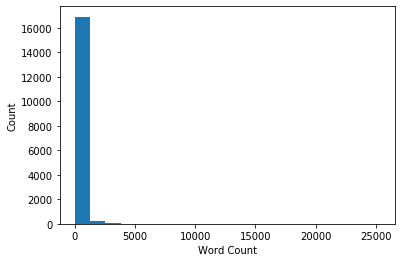

In [286]:
plt.hist(words_more.values(), bins = 20);
plt.xlabel('Word Count');
plt.ylabel('Count');

In [ ]:
sorted(word_bank, key=word_bank.get, reverse=True)

In [316]:
for word in sorted(words_more, key=words_more.get, reverse=True):
    print(word, words_more[word])

people 25290
think 20275
know 19963
thing 17596
time 15650
year 15095
want 13985
look 13772
work 13515
come 13490
way 13426
use 12262
world 12234
need 10454
life 9788
right 9466
good 9392
start 9277
find 8694
tell 8674
change 7790
day 7587
talk 7585
happen 7466
lot 7411
little 7212
kind 7025
new 6974
mean 6903
let 6676
try 6649
different 6292
human 5942
live 5810
idea 5804
woman 5764
ask 5743
problem 5496
story 5463
big 5441
create 5194
today 5170
place 5155
great 5144
system 5108
question 5014
help 5009
child 4992
country 4891
thank 4838
percent 4665
build 4622
learn 4586
fact 4499
feel 4469
turn 4446
brain 4433
love 4350
understand 4177
end 4152
technology 4044
example 3931
important 3917
number 3893
able 3866
point 3819
school 3670
kid 3559
believe 3534
long 3528
water 3517
course 3465
hear 3417
play 3406
experience 3388
bit 3383
body 3371
design 3354
maybe 3345
bring 3337
leave 3312
data 3312
word 3299
ago 3270
person 3219
family 3212
city 3192
grow 3191
old 3186
home 3166
small 31

anymore 555
perform 555
designer 555
demand 554
limit 551
muscle 551
failure 551
consequence 550
effort 550
gender 549
communication 549
justice 547
factor 547
card 546
prevent 542
learning 542
unique 541
nearly 540
emerge 540
beauty 540
main 539
algorithm 538
farmer 538
politics 536
fund 536
remind 536
meaning 536
capture 535
training 535
contain 535
faster 535
unfortunately 535
web 535
refugee 534
wake 533
hair 532
thanks 532
military 532
living 531
mention 531
park 531
floor 530
jump 529
cloud 529
introduce 529
traditional 529
window 529
excited 528
interact 528
neighborhood 527
beat 527
visual 527
o 527
performance 526
happiness 525
strange 524
instance 523
critical 522
genetic 521
email 521
spot 521
loss 521
paint 520
alive 520
sister 519
mistake 519
bunch 517
clearly 517
electricity 517
separate 517
nuclear 515
expert 515
square 514
moon 514
ship 513
sexual 512
responsibility 512
arrive 510
d 510
math 510
yearold 509
enjoy 508
bed 508
financial 508
temperature 507
respect 507
lac

overcome 265
fundamentally 264
agriculture 264
transport 264
director 264
okay 264
elephant 263
electric 263
equation 263
20th 263
importance 263
decline 263
attract 262
epidemic 262
feedback 262
constant 262
awesome 262
management 262
convert 261
cave 261
medication 260
advice 260
error 260
shame 260
motor 260
invention 259
recover 259
rapidly 259
conscious 259
flag 259
relatively 258
empower 258
label 258
anxiety 258
closer 258
radical 258
appreciate 258
manager 257
remote 257
courage 256
dig 256
roof 256
naturally 255
lunch 254
meaningful 254
kitchen 254
explanation 254
secure 254
radiation 254
patent 254
housing 254
primary 254
intelligent 254
staff 253
false 253
worldwide 253
intellectual 253
wood 253
weather 253
demonstrate 253
21st 252
diagnose 252
enemy 252
circumstance 252
clinical 252
crowd 252
interface 252
compete 251
monitor 251
fat 251
trap 251
wheel 250
apartment 250
sight 250
ai 250
kick 250
carefully 250
surgeon 250
distribution 250
super 249
category 249
origin 249
im

lake 149
sacred 149
collectively 149
cable 149
mechanic 149
behavioral 149
joint 149
fabric 149
voter 149
shall 149
cortex 149
triangle 149
spider 149
tension 148
originally 148
hardware 148
mad 148
selection 148
telephone 148
hook 148
adjust 148
civic 148
flee 148
resolve 148
athlete 147
proof 147
regard 147
calorie 147
yield 147
output 147
rotate 147
depressed 147
fascinate 147
twin 147
cute 146
mood 146
achievement 146
cop 146
download 146
minister 146
dominate 146
infant 145
astronaut 145
proper 145
partnership 145
chief 145
intuition 145
precise 145
wealthy 145
testing 145
skull 145
highlight 145
beer 144
ally 144
reputation 144
injustice 144
concentration 144
sensory 144
dictionary 144
cheat 144
exposure 144
interestingly 144
neuroscience 144
pole 144
diagram 144
ought 144
rice 143
pyramid 143
indigenous 143
spark 143
description 143
transplant 143
vegetable 143
calm 142
essence 142
pet 142
optimistic 142
lovely 142
portrait 142
gesture 142
teaching 142
resilience 142
mimic 141
g

differ 75
frustrated 75
nonetheless 75
equip 75
resistant 75
disparity 75
mri 75
nonviolent 75
cricket 75
talented 75
bucket 74
individually 74
propaganda 74
forbid 74
spending 74
costume 74
happily 74
transformative 74
correlate 74
flaw 74
alike 74
firsthand 74
egyptian 74
similarity 74
melody 74
accompany 74
utterly 74
mixture 74
jaw 74
arena 74
accomplishment 74
pirate 74
satisfy 74
heel 73
liberate 73
revelation 73
orientation 73
lobby 73
accidentally 73
celebration 73
helpless 73
marathon 73
summarize 73
unleash 73
commonly 73
pillar 73
integrity 73
critically 73
merge 73
deficit 73
shy 73
ease 73
ecology 73
ladder 73
genuine 73
endanger 73
carpet 73
hightech 73
philanthropy 73
prejudice 73
seawater 73
preparation 73
intent 73
infrared 73
inclusion 72
progressive 72
swear 72
destructive 72
hub 72
chemotherapy 72
obsession 72
ceremony 72
prosthetic 72
tuberculosis 72
incarceration 72
proceed 72
visually 72
alphabet 72
twothirds 72
regenerate 72
entropy 72
violate 72
scrap 72
1960s 

overseas 53
cartoonist 53
submarine 53
verbal 53
regional 53
slogan 53
nut 53
toddler 53
adaptive 53
fluorescent 53
dealer 53
eighth 53
playful 53
diver 53
pro 53
menu 53
climber 53
orphanage 53
consultant 52
vivid 52
acceleration 52
credible 52
reconcile 52
shareholder 52
regenerative 52
eager 52
liar 52
renew 52
junk 52
appliance 52
dependence 52
technologist 52
goodness 52
hypothetical 52
detention 52
capsule 52
hatch 52
powder 52
pity 52
unseen 52
alternate 52
singular 52
slope 52
synapsis 52
orphan 52
beast 52
jewelry 52
countryside 52
specimen 52
culturally 52
spy 52
transcend 52
portal 52
bamboo 52
modification 52
progression 52
reconstruction 52
dragon 52
biomass 52
protester 52
imaginary 52
sprawl 52
commute 51
scarcity 51
unfamiliar 51
brainstorm 51
selfinterest 51
inhabitant 51
imitate 51
choir 51
shiny 51
intentional 51
pollute 51
confusing 51
optimal 51
involved 51
adhesive 51
venus 51
secretly 51
evaporate 51
lawsuit 51
unity 51
discourse 51
crave 51
playground 51
resonan

sanctuary 40
commander 40
hostage 40
oyster 40
stab 40
knit 40
incremental 40
bandwidth 40
stitch 40
beehive 40
remittance 40
lamb 40
pepper 40
hamburger 40
pricing 40
shuffle 40
jihad 40
fractal 40
lg 40
sailing 39
appoint 39
raft 39
ballet 39
serial 39
problemsolving 39
damaging 39
ax 39
counsel 39
intern 39
startling 39
universally 39
marginalize 39
equitable 39
powerfully 39
auto 39
versa 39
organizing 39
merchant 39
memorable 39
erode 39
widen 39
coaster 39
exclusion 39
intensely 39
predictive 39
prevalent 39
kenyan 39
ideally 39
rainy 39
cruise 39
cholesterol 39
emergent 39
hectare 39
dwarf 39
needless 39
genomics 39
orkers 39
posttraumatic 39
hollow 39
cavity 39
erosion 39
uprising 39
agile 39
adoption 39
destine 39
pc 39
treadmill 39
keen 39
skepticism 39
sympathy 39
unaware 39
crust 39
flute 39
academy 39
monsoon 39
litter 39
tourism 39
bronx 39
hood 39
comparable 39
modular 39
oldfashioned 39
fridge 39
messaging 39
inadequate 39
populate 39
offense 39
operational 39
dining 39

deer 32
warp 32
innocence 32
boomer 32
disable 32
sideways 32
emulate 32
navigation 32
improbable 32
pragmatic 32
remix 32
calling 32
dodo 32
bitch 32
socialize 32
undo 32
masculinity 32
fulfillment 32
violently 32
blogging 32
cerebral 32
apartheid 32
furious 31
brace 31
concentrated 31
america 31
policing 31
reliably 31
nationstate 31
popup 31
environmentalist 31
occurrence 31
settler 31
freshwater 31
snippet 31
annually 31
leisure 31
substantially 31
turning 31
led 31
appealing 31
recur 31
suite 31
precedent 31
misunderstanding 31
purity 31
tournament 31
haul 31
counseling 31
decipher 31
subsequently 31
automotive 31
compile 31
heartbreak 31
revise 31
drawer 31
revolt 31
gel 31
hidden 31
dissect 31
superheroes 31
fatty 31
eagle 31
separately 31
irrigation 31
beta 31
creatively 31
twitch 31
wastewater 31
rainbow 31
geologist 31
projector 31
orchard 31
revolve 31
bud 31
genitals 31
compensation 31
rose 31
biography 31
perseverance 31
complement 31
infuse 31
persistence 31
decompose 31


punk 24
lick 24
meritocracy 24
detach 24
closeup 24
hilarious 24
memoir 24
hateful 24
overlay 24
toxicity 24
giving 24
hummingbird 24
frantically 24
considerable 24
charcoal 24
postconflict 24
ventilation 24
hiccup 24
crest 24
speculative 24
groundbreaking 24
unconsciously 24
satisfying 24
thunder 24
subordinate 24
refrigeration 24
multiplication 24
ministry 24
burglar 24
termite 24
radiologist 24
antimatter 24
cuban 24
urchin 24
ham 24
penetration 24
backbone 24
cochlear 24
hospice 24
wrestling 24
classification 24
nationstates 24
albinism 24
barbershop 24
toaster 24
iphones 24
orruption 24
alcoholic 23
ferment 23
herb 23
fastestgrowing 23
focal 23
walker 23
functioning 23
involuntary 23
consistency 23
blackberry 23
barbecue 23
extensively 23
inhale 23
colonization 23
probiotic 23
municipal 23
hazardous 23
blunt 23
endorse 23
jack 23
timeless 23
diversify 23
cumulative 23
malignant 23
prim 23
dormant 23
prolong 23
handwriting 23
mussel 23
jewel 23
fleeting 23
insignificant 23
definiti

marking 20
strangeness 20
aspirational 20
unstoppable 20
whiskey 20
diesel 20
worrying 20
saltwater 20
dove 20
inuit 20
anguish 20
peasant 20
pork 20
oppressive 20
brit 20
roast 20
orthopedic 20
autobiographical 20
superconductor 20
matching 20
coconut 20
ethos 20
amazement 20
taper 20
grizzly 20
dissection 20
jeep 20
synergy 20
squirrel 20
polling 20
roadblock 20
hacking 20
lunar 20
hemoglobin 20
nighttime 20
podcast 20
respectable 20
uv 20
transcendent 20
reel 20
hater 20
doorstep 20
subscription 20
haircut 20
mammalian 20
stats 20
suffocate 20
greeting 20
myriad 20
autumn 20
awakening 20
creed 20
newcomer 20
congregation 20
inorganic 20
irresponsible 20
publicity 20
subvert 20
reimagining 20
illumination 20
treatable 20
intergalactic 20
sinister 20
inclined 20
hawaiian 20
individuality 20
chatter 20
bunker 20
hippie 20
gatekeeper 20
cuisine 20
analogous 20
nothingness 20
depiction 20
hominid 20
semiconductor 20
selfassemble 20
typewriter 20
mop 20
sidebyside 20
retention 20
hairstyl

rite 16
selfishness 16
unsure 16
disprove 16
tremor 16
apex 16
fluffy 16
realist 16
insurgency 16
libertarian 16
medically 16
righteous 16
rightwing 16
saucer 16
decomposition 16
wicked 16
anesthetize 16
squad 16
lucrative 16
spar 16
governmental 16
sigh 16
ovation 16
humanlike 16
barn 16
detrimental 16
witchcraft 16
siren 16
uncharted 16
spacex 16
bycatch 16
bonding 16
hemorrhage 16
bestseller 16
oblige 16
perplex 16
modernism 16
collage 16
childbirth 16
determinant 16
parsec 16
onboard 16
beginner 16
ammunition 16
genesis 16
misunderstand 16
inflatable 16
speaking 16
righthanded 16
wig 16
quartz 16
magnesium 16
showcase 16
dusk 16
theology 16
choreographer 16
longlived 16
continental 16
eater 16
disconnection 16
sweetheart 16
abide 16
organically 16
nonwhite 16
expire 16
gunshot 16
plus 16
impede 16
confidently 16
overreact 16
ecigarettes 16
nicotine 16
prose 16
periodically 16
testicle 16
transact 16
brass 16
ballast 16
vortex 16
humbly 16
timescale 16
notably 16
fucking 16
scorpion

rollercoaster 13
infusion 13
windy 13
genotype 13
peerreviewed 13
indict 13
tinder 13
relearn 13
futuristic 13
exhaustive 13
backstage 13
comrade 13
quake 13
disrespectful 13
syllable 13
teleportation 13
superconducting 13
moss 13
muddy 13
outcast 13
tusk 13
lengthy 13
recruiting 13
unpaid 13
iceland 13
misfortune 13
individualism 13
dehumanize 13
craze 13
retell 13
discriminatory 13
kinetic 13
blessed 13
humorous 13
twentieth 13
atlas 13
deduce 13
respiration 13
proponent 13
completion 13
resettle 13
cache 13
unspeakable 13
proactively 13
biomarker 13
canine 13
drilling 13
maim 13
barrage 13
wobbly 13
reentry 13
bra 13
luminous 13
octahedron 13
rash 13
cheating 13
carnivorous 13
exceptionally 13
humpback 13
enrichment 13
unaids 13
oceanic 13
laughing 13
aperture 13
christianity 13
assurance 13
teddy 13
instantaneous 13
underside 13
latte 13
aka 13
ooze 13
comprehension 13
junky 13
hyena 13
bob 13
palate 13
impulsive 13
yearning 13
fireplace 13
salon 13
divinity 13
devout 13
codify 13


insistence 11
impenetrable 11
rein 11
conspicuous 11
frantic 11
firstyear 11
cryptographer 11
scot 11
indebted 11
horsepower 11
turbo 11
modem 11
deactivate 11
fulfilling 11
cycling 11
criminality 11
whatsapp 11
mug 11
unwavering 11
pastry 11
gracious 11
prod 11
moratorium 11
unhappiness 11
welldocumented 11
onward 11
cunning 11
scavenger 11
trademark 11
beggar 11
insanity 11
electrification 11
lowcarbon 11
asymmetrical 11
grandeur 11
scarcely 11
hooked 11
etiquette 11
earthworm 11
anatomically 11
nonbinary 11
ascribe 11
overgrow 11
herbivore 11
computerized 11
fisher 11
runoff 11
voucher 11
thorn 11
incomprehensible 11
grandiose 11
concentric 11
us.i 11
sequencer 11
engrave 11
anthem 11
mockery 11
straightaway 11
cocreate 11
grossly 11
endangered 11
brew 11
caretaker 11
traitor 11
selfportraits 11
intergenerational 11
heirloom 11
cookbook 11
deterrent 11
united 11
perilous 11
lash 11
sleepdeprived 11
maiden 11
ecstatic 11
threeyear 11
degenerate 11
crippling 11
restlessness 11
druid 1

quadriplegic 10
uncontrolled 10
prickly 10
chaplain 10
doityourself 10
mailing 10
heady 10
moor 10
stillness 10
amber 10
unregulated 10
purposeful 10
flipper 10
sentience 10
blizzard 10
disembody 10
dungeon 10
airbags 10
delusional 10
induced 10
stainless 10
baldness 10
ivf 10
payroll 10
juncture 10
parabola 10
selforganized 10
pr 10
slipper 10
non 10
squish 10
orial 10
taskrabbit 10
concede 10
enceladus 10
gill 10
geiger 10
junction 10
calligraphy 10
sectarian 10
ether 10
mta 10
coherence 10
backdoor 10
latency 10
metronome 10
sdrs 10
lifecode 10
sandy 10
googlers 10
parse 10
bossy 10
pleurobot 10
neurobiologist 10
behead 10
sneakerheads 10
smudge 10
widget 10
pygmy 10
lentil 10
minaret 10
provoice 10
pickandroll 10
trivia 10
justness 10
electrochemical 10
chainsaw 10
orthodoxy 10
peacekeeping 10
airstrip 10
celebratory 10
peg 10
doo 10
orks 10
squarefoot 10
herring 10
crony 10
serif 10
sociable 10
inds 10
elvish 10
baxter 10
dyad 10
maneuverable 10
operant 10
risd 10
nonverbals 10
wi

pacifist 8
instinctual 8
filming 8
inferiority 8
cabo 8
pulmo 8
evacuation 8
promiscuous 8
capitalization 8
individualize 8
catchy 8
intended 8
pragmatism 8
30th 8
tome 8
profanity 8
ostracize 8
2d 8
robogami 8
billiard 8
topical 8
copernicus 8
nurturing 8
sear 8
sierra 8
retriever 8
unanimously 8
joker 8
greatgrandparents 8
doctoral 8
falling 8
helpfully 8
plumb 8
melancholic 8
hoodie 8
respectfully 8
finale 8
rome 8
selfconfident 8
underscore 8
shroud 8
bacillus 8
hem 8
gladly 8
corollary 8
privatize 8
fearsome 8
whooping 8
screech 8
sikh 8
today.i 8
escapism 8
lucid 8
suffragette 8
bonkers 8
compulsory 8
brexit 8
unwritten 8
destitute 8
intersectional 8
arvs 8
coevolved 8
spectrograph 8
alluring 8
stairway 8
puke 8
howl 8
vocation 8
oxygenated 8
ninetyfive 8
corresponds 8
opposed 8
aligned 8
songbird 8
epidemiology 8
neurally 8
cephalopod 8
monolith 8
homeownership 8
mischief 8
22nd 8
complished 8
countable 8
sharecropper 8
gnarly 8
insurer 8
sheen 8
involuntarily 8
mimicry 8
conclu

antler 7
modulator 7
disoriented 7
photorealistic 7
interrelate 7
underappreciated 7
maxim 7
elixir 7
sickly 7
transparently 7
hallowed 7
reconfigure 7
condensed 7
tightrope 7
serpentine 7
26th 7
subtext 7
eulogy 7
misdirection 7
seesaw 7
eastside 7
brokenness 7
unfathomable 7
porcupine 7
airquality 7
faithfully 7
standin 7
obnoxious 7
layoff 7
versatility 7
hasels 7
laborious 7
arbiter 7
pretense 7
finalize 7
underdeveloped 7
blended 7
vetting 7
programme 7
warmly 7
electrocardiogram 7
fdaapproved 7
stilt 7
incinerate 7
seahorse 7
reread 7
myocardial 7
infarction 7
wan 7
fertilized 7
diagonally 7
plump 7
i'm 7
biped 7
docile 7
submissive 7
looter 7
resiliency 7
unsavory 7
preconceive 7
lockdown 7
almond 7
storefront 7
inescapable 7
rampage 7
californian 7
hydraulic 7
marketbased 7
unrestricted 7
bluntly 7
dissociate 7
nauseous 7
hertz 7
sympathize 7
crucify 7
inkblot 7
1900s 7
sigma 7
pedagogical 7
mischievous 7
selfless 7
rebellious 7
calculated 7
acclaim 7
instigate 7
militarized 7


condescend 6
devious 6
foal 6
brutalize 6
apprehension 6
bearer 6
extort 6
problemsolve 6
meetup 6
tylenol 6
indestructible 6
leakage 6
allimportant 6
drier 6
arthritic 6
highachieving 6
outwit 6
matchbox 6
soulless 6
cavernous 6
flirting 6
undervalue 6
tangibly 6
decrepit 6
nash 6
gulp 6
swum 6
figurine 6
vogue 6
reprogramming 6
microchip 6
examiner 6
freemason 6
mudslide 6
orst 6
fluoresce 6
spectrometry 6
opposable 6
biomolecule 6
fourletter 6
clamor 6
paternalistic 6
clearcut 6
entrylevel 6
interconnectivity 6
omnipresent 6
disinformation 6
indomitable 6
colossus 6
flagship 6
rundown 6
bruce 6
constance 6
heath 6
heartache 6
misstep 6
bikini 6
resentful 6
maya 6
pungent 6
onwards 6
behaviorally 6
eightyear 6
overfished 6
stiffen 6
avoidable 6
roundly 6
ail 6
arid 6
springtime 6
gatherer 6
democrat 6
danny 6
revos 6
farmhouse 6
encircle 6
enigmatic 6
plaything 6
waterwade 6
wade 6
riverman 6
witty 6
antiquated 6
conclusively 6
businessperson 6
af 6
ortunities 6
graffiti 6
backandfor

transgenerational 6
penelope 6
unattractive 6
marxist 6
undiagnosed 6
inwardly 6
farright 6
absorber 6
gutted 6
drinkable 6
stinky 6
midway 6
thunderstorm 6
rower 6
compassionately 6
sparkly 6
odorless 6
telly 6
biodegrade 6
gummy 6
politic 6
ulu 6
debtor 6
fixer 6
pretentious 6
twolane 6
principally 6
indulgent 6
zodiac 6
buff 6
geologically 6
posting 6
nourishment 6
twobytwo 6
rabbis 6
revitalization 6
imperceptible 6
perspectivetaking 6
baleen 6
foregone 6
proportionate 6
ubiquity 6
handicapped 6
deterioration 6
fishbowl 6
accepting 6
ortantly 6
orced 6
twowheeler 6
reinvention 6
averse 6
leia 6
sponsorship 6
pharmacology 6
closedloop 6
omnivore 6
gory 6
modestly 6
communicating 6
mycorrhiza 6
clearing 6
noir 6
tentative 6
cavefish 6
cavefishes 6
midday 6
anesthesia 6
mule 6
cesarean 6
whining 6
selfdiscipline 6
wellintended 6
gimme 6
entrainment 6
coupling 6
enterprising 6
fed 6
quill 6
discretionary 6
femur 6
cambrian 6
overconsumption 6
spaniard 6
tracy 6
christopher 6
trite 6
de

purview 5
1920s 5
paypal 5
geneediting 5
airy 5
duckling 5
blacken 5
amphibious 5
obligate 5
problem.i 5
trinity 5
cetera 5
preset 5
yurt 5
stow 5
tradesman 5
inexorably 5
abandonment 5
nonblack 5
stacy 5
discontinue 5
wholebody 5
relaxant 5
microscale 5
snicker 5
jedi 5
bookworm 5
inapp 5
spotify 5
uncomfortably 5
brokk 5
christen 5
memorization 5
inauthentic 5
ecuadorian 5
coercive 5
tory 5
astute 5
crudely 5
exorcism 5
untrained 5
soapy 5
doze 5
radiative 5
denomination 5
roundtable 5
catering 5
bovingdons 5
illusory 5
irreversibly 5
bingewatching 5
delinquent 5
attire 5
inordinate 5
romantically 5
midsummer 5
dissolution 5
vilified 5
reeducate 5
vigilante 5
excrement 5
islander 5
trucking 5
softness 5
plantrich 5
brainbased 5
redress 5
sixletter 5
ma'am 5
drifter 5
artistically 5
bacteriophage 5
selectivity 5
lyft 5
mailer 5
cheeseburger 5
portrayal 5
rapt 5
patronize 5
onoff 5
upsurge 5
multimillionaire 5
unqualified 5
linking 5
childfriendly 5
slumdog 5
dialoguecoffee 5
masked 5


shephelah 5
memeome 5
somet 5
alphabetical 5
adjacency 5
place.i 5
encore 5
telemetry 5
proje 5
po 5
seethrough 5
palmpilots 5
denture 5
superexponential 5
geolocation 5
ultrasonic 5
fide 5
centrality 5
bingo 5
sweatshop 5
coolant 5
specular 5
hospitalacquired 5
mismatcher 5
cowshed 5
superhydrophobic 5
meld 5
motherfucker 5
orhood 5
impregnate 5
flowing 5
doorbell 5
multiplexing 5
tting 5
businessmen 5
abrahamic 5
scoreboard 5
yearbook 5
doublet 5
dropper 5
sunbathe 5
drybath 5
lifesaver 5
cobra 5
stencil 5
multinationals 5
omniscient 5
pogo 5
demonstrator 5
preamble 5
retool 5
petrified 5
budapest 5
daphne 5
testimonial 5
hampton 5
microbloggers 5
stilllife 5
privatepublic 5
acinus 5
carol 5
leatherback 5
oneminute 5
threeinch 5
hyderabad 5
medicalized 5
previvor 5
baton 5
playroom 5
synesthesia 5
synesthetic 5
oratory 5
highcapacity 5
virulence 5
archetypal 5
artful 5
muffle 5
slippage 5
douse 5
trashcan 5
remixes 5
impoundment 5
bpa 5
frill 5
torosaurus 5
gbm 5
matteroffactly 5
isa

highthroughput 4
relish 4
exhusband 4
stalker 4
allmale 4
mislabeled 4
malleability 4
outoftouch 4
scythian 4
alexioss 4
raider 4
aristotle 4
amble 4
theirs 4
razorsharp 4
earthbound 4
quantified 4
dosing 4
printed 4
compounding 4
modeler 4
swathe 4
omics 4
innovatively 4
roboticists 4
shabby 4
frontlines 4
aggressiveness 4
collegiate 4
disgruntle 4
justifiably 4
peewee 4
precariously 4
dumbstruck 4
soloing 4
hiker 4
insulting 4
abrasive 4
southwark 4
gendernonconforming 4
unsupervised 4
ormally 4
ordable 4
microgrid 4
ewaste 4
blackowned 4
trying 4
concurrently 4
cauterize 4
frisk 4
dreamt 4
eon 4
encoding 4
threeletter 4
listing 4
insistent 4
eroticism 4
deafen 4
disassociate 4
epilogue 4
bittersweet 4
poignancy 4
songwriting 4
mei'm 4
happil 4
se 4
1880s 4
cornmeal 4
woundhealing 4
errorprone 4
pinky 4
posthuman 4
disorganize 4
funnily 4
forgiving 4
inhalation 4
arraign 4
blackmail 4
burglarize 4
coverup 4
zilch 4
lethality 4
reassured 4
paltry 4
hypersensitive 4
throb 4
droop 4
pha

ifafricawasabar 4
patrice 4
zimbabwean 4
dromedary 4
fouetté 4
airbed 4
dirge 4
hoodwink 4
pioneering 4
pravastatin 4
matchmaker 4
rowdy 4
manta 4
trout 4
grimm 4
midocean 4
sippy 4
reimplant 4
gfr 4
consummate 4
quench 4
poultry 4
textual 4
geospatial 4
elucidate 4
rword 4
vertebra 4
heading 4
discretely 4
oedipus 4
centrifugal 4
selfmastery 4
biotic 4
cantilever 4
wrong.i 4
dossier 4
microworld 4
supersymmetry 4
multiethnic 4
lifeboat 4
spawning 4
godsend 4
greenwalled 4
orgy 4
yellowfin 4
hedonism 4
hedonist 4
dissuade 4
negligent 4
supergays 4
disown 4
lifi 4
energyharvesting 4
locksmith 4
premortem 4
speleologist 4
massif 4
balancer 4
arson 4
antigovernment 4
visitation 4
interpol 4
rfid 4
malnourish 4
benchmarking 4
3dprinted 4
multifunctional 4
healthily 4
acknowledgement 4
senile 4
wry 4
dis 4
dualism 4
equilateral 4
sensorial 4
airconditioned 4
on't 4
pune 4
equalize 4
condor 4
twoinch 4
ornithologist 4
robin 4
triptych 4
wiretapped 4
colorado 4
carelessly 4
demented 4
uncompa

phc 3
phcs 3
dysentery 3
tench 3
unforgivable 3
plussize 3
exclusivity 3
salivary 3
smelling 3
aldehyde 3
biosensor 3
enamor 3
getup 3
bioink 3
printable 3
bioinks 3
waterrich 3
printhead 3
unburnable 3
abysmally 3
afield 3
rapacious 3
evangelism 3
communityled 3
temperamental 3
salinity 3
thirtynine 3
regrown 3
pieinthesky 3
ravenous 3
panoply 3
americanness 3
mus 3
treachery 3
dantes 3
allegorical 3
storied 3
beingness 3
selfactualized 3
biophysics 3
whitefly 3
minion 3
fortytwo 3
ragpicker 3
herman 3
derisive 3
lessig 3
stromatolites 3
countrywide 3
bangle 3
constructed 3
rubric 3
splurge 3
umami 3
sugarreduced 3
disentangle 3
inpatient 3
drugaddicted 3
nonmedical 3
prewar 3
cecil 3
agriculturalist 3
heres 3
specified 3
oclock 3
sixstory 3
merging 3
makey 3
unsuccessfully 3
nationbuilding 3
noisewith 3
gogo 3
somebodybe 3
knowon 3
knowand 3
apricot 3
inbound 3
mayflower 3
salvaged 3
roys 3
constitutionally 3
ammu 3
raindrops 3
countermovement 3
wayside 3
kaboom 3
maneaters 3
crossbo

consequent 3
seated 3
lube 3
smalltime 3
weedrelated 3
overrule 3
prefabricatio 3
architecturally 3
postmodernist 3
singlefamily 3
withdrawn 3
jones 3
vacillate 3
unafrican 3
somaliamerican 3
hydropower 3
outpace 3
freeing 3
truer 3
diffraction 3
digits 3
econometric 3
callback 3
unannounced 3
profiteer 3
retort 3
dispersion 3
wellprepared 3
blacksmith 3
nonliterate 3
jockey 3
curtis 3
wharf 3
tabby 3
unexplainable 3
steampowered 3
prefab 3
upgraded 3
workbench 3
makerspace 3
akan 3
anester 3
quash 3
immortalize 3
commoner 3
anglosaxon 3
strung 3
breathy 3
priam 3
unease 3
morphs 3
busily 3
cafés 3
undaunted 3
averaging 3
downshift 3
datarich 3
acrostic 3
eurasian 3
bragg 3
accost 3
earthmoon 3
axial 3
chaotically 3
lenin 3
brushing 3
login 3
datamining 3
cavalier 3
panopticon 3
oligarch 3
powerhungry 3
consul 3
courier 3
queryable 3
chardonnay 3
disrupters 3
exhales 3
multistep 3
onestep 3
freeliving 3
spacebased 3
registered 3
encouraged 3
scald 3
hardened 3
flesheating 3
inexcusable

catharsis 3
repaint 3
threeweek 3
hopedfor 3
concierge 3
ethereum 3
permissionless 3
cougar 3
steadfast 3
harry 3
sentimentality 3
supple 3
prealgebra 3
worksheet 3
minutia 3
deadlocked 3
peña 3
twinkly 3
overcoat 3
groot 3
featurelength 3
mid1700s 3
asymmetrically 3
soto 3
stingy 3
singersongwriter 3
ringtone 3
bomblet 3
cenard 3
grandstand 3
malaise 3
oceanographer 3
ethane 3
bogged 3
debttogdp 3
lowproductivity 3
embeddedness 3
splendidly 3
reducible 3
glottis 3
airbreathing 3
swat 3
highgrade 3
hydrological 3
wilkins 3
swellable 3
colorcoded 3
bioengineer 3
ply 3
overbearing 3
anamorphic 3
hydrogenotrophs 3
proteinrich 3
citrus 3
paperthin 3
mythbusters 3
costuming 3
sweatsuit 3
hrr 3
shyly 3
antagonistic 3
shaded 3
supercritical 3
ichthyologist 3
incriminate 3
handwrite 3
dutyfree 3
biogenic 3
elizabethan 3
searching 3
inbreeding 3
allornothing 3
soldering 3
iranianamerican 3
huckster 3
ploy 3
va 3
consecutively 3
housekeeping 3
selfexplanatory 3
congrats 3
posing 3
blingbling 3
p

elongated 2
34th 2
misogyny 2
mastered 2
zealous 2
banknote 2
icecream 2
yiddish 2
basis.i 2
legionella 2
scarily 2
complexed 2
ultrafine 2
corneal 2
laceration 2
patellar 2
zenlike 2
megajackpot 2
lossframed 2
batmobile 2
nonrational 2
80th 2
whackamole 2
callin 2
stubble 2
selfreplicated 2
pluralism 2
postmatch 2
carryover 2
pronounced 2
svadilfari 2
frappuccinos 2
son.i'm 2
forebode 2
disturbingly 2
teacherstudent 2
piggy 2
saucy 2
cocky 2
brainy 2
oneone 2
averagetolargesized 2
smock 2
comp 2
nother 2
acetaminophen 2
fmcg 2
traits 2
sinjar 2
emir 2
trapeze 2
overstay 2
withered 2
antebellum 2
cocreated 2
oh.[burned 2
fairgoers 2
conformist 2
rulefollowing 2
durkheim 2
twosided 2
userfriendly 2
immigrants 2
mid1960s 2
reunification 2
roundup 2
guantanamo 2
achiever 2
unconquerable 2
demotivating 2
aimlessly 2
spittle 2
welt 2
caracaracol 2
edf 2
chlorine 2
vociferous 2
devastatingly 2
inescapably 2
psychoanalyze 2
unknow 2
stuckness 2
helprejecting 2
complainer 2
masonic 2
weishaupt

plath 2
woodstock 2
unnerve 2
tailgate 2
sleet 2
wellpreserved 2
detailoriented 2
testtakers 2
prejudiced 2
disproven 2
jiminy 2
enfranchised 2
pokemon 2
pinafore 2
70th 2
brits 2
handwrist 2
premolar 2
intraspecific 2
lesedi 2
largebrained 2
paleoanthropologists 2
togolese 2
subjugation 2
twine 2
awakens 2
octavia 2
drawbridge 2
pigtail 2
father.i 2
feminization 2
objector 2
rustins 2
bidirolling 2
lurid 2
sinful 2
explodes 2
spaghettilike 2
firstgraders 2
insularity 2
mitten 2
invests 2
dramatize 2
finiteness 2
seaman 2
gatekeeping 2
entrepreneurism 2
letterbyletter 2
atcgs 2
malariacarrying 2
kardashian 2
equates 2
snowflakes 2
redact 2
puzzled 2
enmesh 2
macrocosm 2
patients 2
classist 2
walkin 2
nasra 2
socialservice 2
lawnmowers 2
watchman 2
hemispatial 2
underrepresentation 2
blackcolored 2
popculture 2
spammed 2
damper 2
swaying 2
wright 2
een 2
rge 2
ncer 2
ecomes 2
rently 2
lthy 2
pplied 2
ging 2
nd 2
ecoming 2
lity 2
nge 2
llow 2
doption 2
tures 2
predestine 2
ctively 2
le 2

amc 2
disloyal 2
doover 2
resubscribe 2
educatorcentric 2
throwback 2
unvarnished 2
aroundtheclock 2
pantgrunting 2
glucocorticoid 2
lowestranking 2
consoler 2
lowranking 2
arnhem 2
matriarchal 2
archery 2
battleaxes 2
cantonese 2
slowcooked 2
parmesan 2
peru 2
motswana 2
traipse 2
chopping 2
wrack 2
meditating 2
delayed 2
distributed 2
inclusively 2
selfimproving 2
deepmind 2
asilomar 2
hedonistic 2
riskfree 2
aligns 2
causeway 2
crouton 2
expressed 2
lcd 2
feathery 2
refers 2
fovea 2
shrimplike 2
nutraceuticals 2
callousunemotional 2
mistranslation 2
prorussia 2
clickbait 2
nearshore 2
videosharing 2
commenters 2
crisis.i 2
nestled 2
gasping 2
narcan 2
clive 2
tony 2
retelling 2
ennoble 2
deindustrialization 2
sixfold 2
metamaterials 2
powergeneration 2
inaccurately 2
vultures 2
whitetailed 2
linoleum 2
embroidered 2
plaid 2
yam 2
eliminates 2
proprioceptive 2
residuum 2
bidirectionally 2
interfaced 2
dork 2
suicided 2
footy 2
tafes 2
contactless 2
pseudonymous 2
hospitalisation 2
cr

pavers 2
mirrored 2
hangout 2
skidmore 2
canvass 2
ochre 2
protagoras 2
bracing 2
despotism 2
prepackaged 2
bubbleknowing 2
selfwatering 2
stymie 2
swimmingly 2
handselected 2
bugle 2
goin' 2
cory 2
tenzing 2
chessboard 2
palmer 2
doomsayers 2
rube 2
maelstrom 2
observant 2
beckons 2
tenthousandth 2
reshuffle 2
demonstrably 2
handsand 2
deformed 2
micronesian 2
insecticides 2
aedes 2
gmo 2
voynich 2
bookseller 2
gullible 2
ambrogio 2
enthrone 2
compatriot 2
chattering 2
healthfully 2
foremother 2
obesityrelated 2
valueladen 2
underreported 2
harriet 2
chitlins 2
sleepfriendly 2
unequivocal 2
soso 2
toughen 2
postpunk 2
ostrogoth 2
odoacer 2
androgynous 2
steampunk 2
remarried 2
starkly 2
astound 2
consumed 2
nastiness 2
deranged 2
throbbing 2
moneylender 2
overexpose 2
acronyms 2
selfabsorption 2
chakra 2
beluga 2
décimas 2
uruguayan 2
thirteenth 2
hooray 2
halfbaked 2
bridget 2
brennan 2
cornell 2
ostracizing 2
virility 2
dnc 2
exploitable 2
feckless 2
unflinchingly 2
bestdocumented 2

unburdened 2
tedlike 2
taber 2
extravehicular 2
topological 2
upanddown 2
innovat 2
lolcat 2
pseu 2
privacyenhancing 2
headstart 2
handpicking 2
rotorcraft 2
unman 2
sarbot 2
coastland 2
bujold 2
heatresistant 2
sprouting 2
thermodynamic 2
jostling 2
workhorse 2
cryptochrome 2
quantumentangled 2
animalheaded 2
equivalency 2
ontology 2
codfish 2
aesthetical 2
tomás 2
saraceno 2
dreams.i 2
autismsees 2
autismassistive 2
higherfunctioning 2
microprinted 2
agora 2
gusto 2
gung 2
sevenminute 2
whitopians 2
whitopian 2
scoliosis 2
mapmakers 2
ernest 2
slant 2
sphinx 2
peacebuilder 2
plagiarize 2
lectern 2
acerbic 2
heathrow 2
gawker 2
gleeful 2
hilarity 2
ants 2
protogermanic 2
dateathon 2
talkline 2
antitrafficking 2
decadence 2
haggard 2
diametrical 2
gayness 2
frazzle 2
tirade 2
diamorphine 2
chinatown 2
heidi 2
intel 2
spanx 2
mascara 2
homecooked 2
tamer 2
thirdyear 2
dogooder 2
nerveblock 2
jumpsuit 2
moby 2
eking 2
avoids 2
driverassisted 2
firehouse 2
postantibiotic 2
squandering 2
g

disvalue 2
prere 2
orrowed 2
virtualized 2
calpers 2
ecomaterials 2
biodegradability 2
overfill 2
systemsbased 2
oversimplistic 2
selfeffacing 2
massmanufactured 2
capriciousness 2
orchestration 2
megalomaniacal 2
compendium 2
breadboxsized 2
pointing 2
noisier 2
grinding 2
fissionfusion 2
hibernate 2
fac 2
sulu 2
einsteinian 2
unambiguously 2
selfpacing 2
spidey 2
vibrato 2
kpis 2
reenforce 2
diffusely 2
brimstone 2
hangups 2
lustily 2
ermine 2
divan 2
breech 2
needlestick 2
applicator 2
needlefree 2
langerhans 2
nanopatches 2
nanogram 2
resourcepoor 2
vestibular 2
semicircular 2
spaceage 2
christo 2
bookend 2
archivio 2
stato 2
interpretative 2
drivethru 2
socializing 2
kickstarts 2
sic 2
tric 2
francophone 2
toqborni 2
noor 2
stripper 2
scumbags 2
ick 2
cratered 2
pedestrianfriendly 2
slapping 2
denigrate 2
minutebyminute 2
quintiles 2
anosmia 2
remotion 2
dampener 2
cosmesis 2
nullity 2
catatonic 2
exorcise 2
nondepressed 2
burdensome 2
cingulotomy 2
selflearning 2
smush 2
dreg 2
b

earmuff 2
shortcuts 2
altiplano 2
foodie 2
slough 2
costello 2
conciling 2
rulebook 2
latticework 2
quizzically 2
pedantic 2
coevolving 2
cropland 2
lovins 2
cogeneration 2
hatching 2
maimed 2
maezza 2
trifold 2
lewd 2
onefoot 2
extr 2
wrongheaded 2
dentistry 2
proteomic 2
polygamy 2
degrades 2
machinelike 2
gooseberry 2
antiserum 2
singleengine 2
incinerator 2
sagittal 2
injectable 2
broach 2
spitting 2
bolivian 2
bioenergy 2
equitably 2
photostat 2
huhh 2
subgoals 2
pinball 2
segway 2
prer 2
melding 2
elaboration 2
neverbeendonebefore 2
airfoil 2
rocketcam 2
retroviral 2
aerovironment 2
avionics 2
heterodoxy 2
seasoned 2
watthour 2
shotglass 2
saunders 2
deflector 2
padding 2
eulogist 2
glassbottom 2
yentl 2
microvascular 2
octane 2
uncompetitive 2
incompatibility 2
frack 2
triassic 2
predominance 2
conglomeration 2
conurbation 2
babes 2
jungian 2
unobtainable 2
freerider 2
superorganisms 2
swenet 2
alsoran 2
smattering 2
infographic 2
ionosphere 2
heatwaves 2
cocacola 2
edgar 2
slin

erudite 2
valles 2
crustal 2
rocketpowered 2
aeroshell 2
honorarium 2
wearing 2
shekhar 2
imax 2
lhotse 2
preloaded 2
oneweek 2
babycam 2
trig 2
sensorybased 2
horseshoer 2
goofball 2
moo 2
readmission 2
pedometer 2
scripps 2
atrial 2
technium 2
evolvability 2
tungsten 2
tenfoot 2
dimensionalize 2
postbureaucratic 2
panning 2
photosynths 2
geezer 2
farmtoschool 2
riparian 2
moire 2
navigenics 2
firstorder 2
dipstick 2
conver 2
impai 2
exci 2
enga 2
matc 2
terrifyingly 2
intercropping 2
interesting.i'm 2
ultralowcost 2
reheat 2
crushing 2
empirebuilding 2
sunitha 2
middleage 2
decellularized 2
accordion 2
raqs 2
freediving 2
purging 2
askew 2
shoemaker 2
jovians 2
calabiyau 2
uncapitalized 2
agra 2
reconnection 2
steely 2
chambal 2
usda 2
procreative 2
greatgreatgreatgranddaughter 2
seventhday 2
adventists 2
radiographer 2
antifashion 2
purposebuilt 2
brachial 2
balloonist 2
selfs 2
stly 2
bpo 2
necktie 2
redditors 2
childsoldiers 2
clare 2
upstage 2
armwrestle 2
nuclearfree 2
nucaler 2

In [317]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, train_test_split

In [323]:
X = talk_df.transcript
y = talk_df.views

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [331]:
X_token = X_train.apply(spacy_tokenizer)

In [337]:
def get_new_transcript(lemmas):
    transcript = ''
    for lemma in lemmas:
        transcript += lemma.strip() + ' '
    return transcript.strip()

In [421]:
X_token_trans = X_token.apply(get_new_transcript)
cv_tok = CountVectorizer(max_df=0.6, min_df=4)

In [422]:
dtm_cv_tok = cv_tok.fit_transform(X_token_trans)

In [423]:
len(cv_tok.get_feature_names())

15133

In [428]:
lsa_cv = TruncatedSVD(n_components = 20, algorithm = 'randomized', n_iter = 3, random_state = 42)
lsa_cv.fit(dtm_cv_tok)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=3, random_state=42,
             tol=0.0)

In [429]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [430]:
display_topics(lsa_cv, cv_tok.get_feature_names(), 10)

Topic 0:
kind idea human problem ask story big live woman question
Topic 1:
woman child country men story girl school family kid love
Topic 2:
brain woman cell body men child patient girl love neuron
Topic 3:
country cell percent health disease patient woman brain food system
Topic 4:
kid child school brain learn student country play family parent
Topic 5:
data woman company computer question problem information technology idea example
Topic 6:
brain city country woman space neuron water area energy building
Topic 7:
story country ocean planet earth question specie human water universe
Topic 8:
story city cell brain country building live love feel patient
Topic 9:
child light story data black universe hole cell space galaxy
Topic 10:
story data child technology computer woman food kid water machine
Topic 11:
car data percent kid story patient light money dollar water
Topic 12:
data child human city health robot care patient system family
Topic 13:
robot car child technology country hum

In [432]:
import random

In [435]:
for i in range(10):
    random_word_id = random.randint(0,len(cv_tok.get_feature_names()))
    print(cv_tok.get_feature_names()[random_word_id])

log
throughput
cambodian
parliamentarian
figurative
recyclable
underrepresented
handbag
pathological
liable


In [400]:
def print_dtm(topic_model, dtm):
    # Create Document - Topic Matrix
    output = topic_model.transform(dtm)

    # column names
    topicnames = ["Topic" + str(i) for i in range(topic_model.n_components)]

    # index names
    docnames = ["Doc" + str(i) for i in range(dtm.shape[0])]

    # Make the pandas dataframe
    df_document_topic = pd.DataFrame(np.round(output, 2), columns=topicnames, index=docnames)

    # Get dominant topic for each document
    dominant_topic = np.argmax(df_document_topic.values, axis=1)
    df_document_topic['dominant_topic'] = dominant_topic

    # Get next dominant topic for each document
    sorted_topics = np.argsort(df_document_topic.values, axis = 1)
    secondary_topic = [doc[-2] for doc in sorted_topics]
    df_document_topic['seconary_topic'] = secondary_topic

    # Styling
    def color_green(val):
        color = 'green' if val > .1 else 'black'
        return 'color: {col}'.format(col=color)

    def make_bold(val):
        weight = 700 if val > .1 else 400
        return 'font-weight: {weight}'.format(weight=weight)

    # Apply Style
    df_document_topics = df_document_topic.head(100).style.applymap(color_green).applymap(make_bold)
    return df_document_topics

In [401]:
print_dtm(lsa_cv, dtm_cv_tok)

In [441]:
lda_model = LatentDirichletAllocation(n_components=20,           # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=42,           # Random state
                                      batch_size=100,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                      )

In [442]:
lda_model.fit(dtm_cv_tok)

LatentDirichletAllocation(batch_size=100, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [448]:
display_topics(lda_model, cv_tok.get_feature_names(), 15)

Topic 0:
animal specie ocean fish human gene dna live sea bird coral shark evolution water genome
Topic 1:
poem poetry wheelchair poet janitor virgin forager mustard edi koran write spicy email castle popcorn
Topic 2:
language word book write letter speak sentence english speaker read dictionary speech learn example meaning
Topic 3:
kind feel idea ask learn love turn great person hand experience maybe story play guy
Topic 4:
music sound play voice hear song listen sing instrument video record piece noise note musician
Topic 5:
food eat virus bacteria vaccine ant microbe egg insect smell disease body organism chemical infection
Topic 6:
health patient disease doctor drug cancer care treatment medical hospital die medicine study cause heart
Topic 7:
woman child family school country men kid young community girl help ask live mother parent
Topic 8:
story war power history great place believe begin live century kill leave political democracy government
Topic 9:
brain cell body robot human 

In [444]:
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [447]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, dtm_cv_tok, cv_tok, mds='tsne')
panel

//anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      -10.878068   10.538728       1        1  24.784678
17     -60.884026  -75.591820       2        1  22.632565
7       -2.336119  -53.289074       3        1  13.532759
8      -61.385319  -12.914634       4        1   9.285266
9      -28.737743  126.296997       5        1   5.693543
14       1.066606 -123.552811       6        1   4.874351
16      45.140720   -7.947869       7        1   3.833633
6     -140.795975  -98.530548       8        1   2.809507
12      61.531681  -83.240562       9        1   2.554804
0      -72.563057 -140.396881      10        1   2.282259
11      15.984491   63.578186      11        1   1.781172
5     -160.851624   68.945145      12        1   1.349548
4       85.961830   51.922935      13        1   1.313083
10     -99.020836  109.936348      14        1   1.307192
19    -176.764130   -8.681684      15        1   1.250066
2     -117.189880  -37.420200      16        1   0.576393
1      108.829918  -22.946203      17        1   0.083844
13      47.588097  121.934814      18        1   0.034345
18    -106.467834   30.176889      19        1   0.011416
15     -50.613804   59.328842      20        1   0.009575, topic_info=      Category         Freq         Term        Total  loglift  logprob
14997  Default  2605.000000         word  2605.000000  30.0000  30.0000
7862   Default  3409.000000         love  3409.000000  29.0000  29.0000
3276   Default  2854.000000         data  2854.000000  28.0000  28.0000
10739  Default  4014.000000     question  4014.000000  27.0000  27.0000
10022  Default  2670.000000         play  2670.000000  26.0000  26.0000
15058  Default  2365.000000        write  2365.000000  25.0000  25.0000
9035   Default  3238.000000       number  3238.000000  24.0000  24.0000
1486   Default  1895.000000         book  1895.000000  23.0000  23.0000
1554   Default  3696.000000        brain  3696.000000  22.0000  22.0000
7509   Default  1539.000000     language  1539.000000  21.0000  21.0000
2222   Default  2510.000000         city  2510.000000  20.0000  20.0000
2586   Default  2051.000000     computer  2051.000000  19.0000  19.0000
14980  Default  4419.000000        woman  4419.000000  18.0000  18.0000
3546   Default  2752.000000       design  2752.000000  17.0000  17.0000
6122   Default  2718.000000         hear  2718.000000  16.0000  16.0000
5256   Default  1982.000000         food  1982.000000  15.0000  15.0000
14773  Default  2581.000000        water  2581.000000  14.0000  14.0000
12578  Default  1777.000000        sound  1777.000000  13.0000  13.0000
7586   Default  3504.000000        learn  3504.000000  12.0000  12.0000
786    Default  4514.000000          ask  4514.000000  11.0000  11.0000
6431   Default  4734.000000        human  4734.000000  10.0000  10.0000
2003   Default  2478.000000         cell  2478.000000   9.0000   9.0000
6117   Default  1937.000000       health  1937.000000   8.0000   8.0000
10875  Default  1718.000000         read  1718.000000   7.0000   7.0000
553    Default  1719.000000       animal  1719.000000   6.0000   6.0000
7699   Default  2630.000000        light  2630.000000   5.0000   5.0000
12625  Default  1552.000000        speak  1552.000000   4.0000   4.0000
13008  Default  1765.000000      student  1765.000000   3.0000   3.0000
4662   Default  3202.000000      example  3202.000000   2.0000   2.0000
8693   Default  1247.000000        music  1247.000000   1.0000   1.0000
...        ...          ...          ...          ...      ...      ...
9626   Topic20     0.009636     particle   409.189544  -1.4026  -9.6198
12798  Topic20     0.009617     standard   439.953982  -1.4771  -9.6219
8483   Topic20     0.009617        model  1490.672893  -2.6975  -9.6219
5273   Topic20     0.009615        force  1226.174652  -2.5023  -9.6221
7862   Topic20     0.009612         love  3409.625192  -3.5254  -9.6224
8128   Topic20   

In [380]:
tfidf = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.50)

In [381]:
dtm_tfidf_tok = tfidf.fit_transform(X_token_trans)

In [382]:
lsa_tfidf = TruncatedSVD(n_components = 15, algorithm = 'randomized', n_iter = 3, random_state = 42)
lsa_tfidf.fit(dtm_tfidf_tok)

TruncatedSVD(algorithm='randomized', n_components=15, n_iter=3, random_state=42,
             tol=0.0)

In [402]:
display_topics(lsa_tfidf, tfidf.get_feature_names(), 15)

Topic 0:
woman story child brain country love kid problem feel school build city technology percent system
Topic 1:
woman child girl men school kid family story country mother young love parent father community
Topic 2:
brain cell woman body patient cancer neuron disease memory love feel blood drug doctor heart
Topic 3:
cell country patient woman disease health cancer drug percent government treatment doctor care food company
Topic 4:
woman water ocean earth planet animal fish specie sea plant light men girl energy body
Topic 5:
woman data men universe company planet democracy computer information political robot galaxy medium sex earth
Topic 6:
city woman building design space build architecture cell men brain car street architect robot urban
Topic 7:
brain city neuron country music language political government war democracy memory climate social word society
Topic 8:
brain woman robot kid school child girl student neuron teacher education energy food car water
Topic 9:
robot music w

In [403]:
print_dtm(lsa_tfidf, dtm_tfidf_tok)

# Spacy Tokenizer not working without Vectorizer

In [327]:
cv_test = CountVectorizer(tokenizer=spacy_tokenizer, max_df=0.50, min_df=2, stop_words='english')
dtm_cv_train = cv_test.fit_transform(X_train)

//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [329]:
len(cv_test.get_feature_names())

27410

In [330]:
cv_test.get_feature_names()

['..',
 '...',
 '....',
 '.....',
 '......',
 '.......',
 '........',
 '.........',
 '..........',
 '...........',
 '............',
 '.............',
 '1',
 '10th',
 '10x',
 '11th',
 '12th',
 '13th',
 '14th',
 '15th',
 '1600s',
 '16th',
 '1700s',
 '17th',
 '1800s',
 '1840s',
 '18th',
 '1900s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '19th',
 '1st',
 '20',
 '20th',
 '21st',
 '22nd',
 '23rd',
 '26th',
 '27th',
 '28th',
 '29th',
 '2d',
 '2nd',
 '30',
 '3d',
 '3dp',
 '3dprinted',
 '3rd',
 '40',
 '401k',
 '42nd',
 '4th',
 '50',
 '50th',
 '57th',
 '5k',
 '5th',
 '60',
 '60k',
 '60s',
 '70',
 '7th',
 '80',
 '8th',
 '90',
 '9th',
 'a.m.',
 'ab',
 'aback',
 'abacus',
 'abalone',
 'aban',
 'abandon',
 'abate',
 'abatement',
 'abattoir',
 'abaya',
 'abbreviation',
 'abdi',
 'abdicate',
 'abdo',
 'abdomen',
 'abdominal',
 'abduct',
 'abduction',
 'aberration',
 'abhor',
 'abhors',
 'abi',
 'abid',
 'abide',
 'abies',
 'ability',
 'abitat',
 'abject',
 'ablaze',
 'abl

# WordNet Lemma Exploration

In [169]:
for lemma in wordnet.lemmas('create'):
    print('Lemma: ' + str(lemma))
    print('DRF: ' + str(lemma.derivationally_related_forms()))
    print('Pertainyms: ' + str(lemma.pertainyms()))

Lemma: Lemma('make.v.03.create')
DRF: [Lemma('creature.n.02.creature'), Lemma('animal.n.01.creature')]
Pertainyms: []
Lemma: Lemma('create.v.02.create')
DRF: [Lemma('creative.s.02.creative'), Lemma('creation.n.03.creation'), Lemma('creation.n.02.creation'), Lemma('creation.n.05.Creation'), Lemma('initiation.n.02.creation'), Lemma('creation.n.01.creation')]
Pertainyms: []
Lemma: Lemma('create.v.03.create')
DRF: [Lemma('creative.s.02.creative'), Lemma('creative.a.01.creative'), Lemma('creation.n.01.creation'), Lemma('creator.n.02.creator')]
Pertainyms: []
Lemma: Lemma('create.v.04.create')
DRF: []
Pertainyms: []
Lemma: Lemma('create.v.05.create')
DRF: [Lemma('creative.s.02.creative'), Lemma('creative.a.01.creative'), Lemma('creation.n.03.creation')]
Pertainyms: []
Lemma: Lemma('produce.v.02.create')
DRF: [Lemma('creation.n.02.creation'), Lemma('creation.n.01.creation')]
Pertainyms: []


In [161]:
for lemma in wordnet.lemmas('creative'):
    print('Lemma: ' + str(lemma))
    print('DRF: ' + str(lemma.derivationally_related_forms()))
    print('Pertainyms: ' + str(lemma.pertainyms()))

Lemma: Lemma('creative.a.01.creative')
DRF: [Lemma('create.v.05.create'), Lemma('create.v.03.create'), Lemma('creativity.n.01.creativeness'), Lemma('creativity.n.01.creativity')]
Pertainyms: []
Lemma: Lemma('creative.s.02.creative')
DRF: [Lemma('create.v.05.create'), Lemma('create.v.02.create'), Lemma('create.v.03.create'), Lemma('creativity.n.01.creativeness'), Lemma('creativity.n.01.creativity')]
Pertainyms: []


In [163]:
for lemma in wordnet.lemmas('creativity'):
    print('Lemma: ' + str(lemma))
    print('DRF: ' + str(lemma.derivationally_related_forms()))
    print('Pertainyms: ' + str(lemma.pertainyms()))

Lemma: Lemma('creativity.n.01.creativity')
DRF: [Lemma('creative.s.02.creative'), Lemma('creative.a.01.creative')]
Pertainyms: []


In [165]:
for lemma in wordnet.lemmas('creation'):
    print('Lemma: ' + str(lemma))
    print('DRF: ' + str(lemma.derivationally_related_forms()))
    print('Pertainyms: ' + str(lemma.pertainyms()))

Lemma: Lemma('creation.n.01.creation')
DRF: [Lemma('produce.v.02.create'), Lemma('create.v.02.create'), Lemma('create.v.03.create')]
Pertainyms: []
Lemma: Lemma('creation.n.02.creation')
DRF: [Lemma('produce.v.02.create'), Lemma('create.v.02.create')]
Pertainyms: []
Lemma: Lemma('creation.n.03.creation')
DRF: [Lemma('create.v.05.create'), Lemma('create.v.02.create')]
Pertainyms: []
Lemma: Lemma('initiation.n.02.creation')
DRF: [Lemma('create.v.02.create')]
Pertainyms: []
Lemma: Lemma('creation.n.05.Creation')
DRF: [Lemma('create.v.02.create')]
Pertainyms: []
Lemma: Lemma('universe.n.01.creation')
DRF: []
Pertainyms: []


In [167]:
wordnet.morphy('creation', wordnet.NOUN)

'creation'

In [168]:
wordnet.morphy('creativity', wordnet.NOUN)

'creativity'